# Assignment 2: Data Analysis Report
# Analyzing External Factors Influencing House Prices: The Role of Crime and Household Income in Sydney’s Suburbs (2016–2021)


## Assessment Requirements Summary

### Requirement 1: Well-defined Questions and Problem Significance  
- Addressed in **Section 1** through clearly stated research questions and explanation of the real-world relevance of crime, income, and property factors on Sydney house prices.

### Requirement 2: Data Cleaning, Preprocessing, and Exploration  
- Covered in **Section 2** and **Section 4**, including dataset merging, variable identification, missing value handling, transformation (e.g., log), and detailed univariate and bivariate analysis.

### Requirement 3: Baseline and Advanced Models  
- **Baseline Models**: Linear Regression, Polynomial Regression, RFE, KNN — implemented in **Section 5.1**  
- **Advanced Models (Week 7+)**: Decision Tree, Random Forest, KMeans, DBSCAN — implemented in **Sections 5.2 to 5.4**

### Requirement 4: Model Justification and Comparison  
- Rationale and performance comparisons discussed in **Sections 5.1.4**, **5.2.3**, and **5.3.2**, including evaluation and advantages and disadvantages.

### Requirement 5: Visualisation and Analysis  
- Visual tools used: histograms, scatter plots, boxplots, pairplots, clustering plots, confusion matrix, and more — distributed throughout **Sections 4 to 5 (inclusive)**.  
- Detailed interpretation is provided for each visual. Final conclusions are presented in **Section 6**.

## 1. Introduction

### 1.1 Problem Statement

Most house price studies focus on property features like size and age. However, external factors such as suburb characteristics—particularly crime rates—play a critical role in shaping property values. Crime can affect a suburb’s reputation and desirability, influencing house prices beyond physical attributes. This project investigates how crime intensity and household income levels together impact house prices across Sydney suburbs.

### 1.2 Purpose of the Analysis

This project aims to examine the relationship between local crime rates and house prices across Sydney suburbs over the period from 2016 to 2021. By combining BOCSAR crime data with Sydney house sales prices and integrating relevant data on Sydney house prices including the suburv median income, this project will identify how suburb characteristics influence house prices.

Key objectives include:

- Identifying which types of crime (e.g., theft, assault, property damage) most strongly influence house prices.
- Use baseline and advanced predictive models learned in this unit to estimate house price changes based on crime trends and income data.
- Highlighting existence of suburbs where house prices increase despite rising crime rates, suggesting the influence of other dominant factors. 
- How does the categorical monthly crime rate (Low, Medium, High) impact the distribution of house prices across Sydney suburbs, and can we predict price categories effectively using only categorical variables like crime rate, property type, and suburb?

### 1.3 Research Questions

- How do different types of crime (e.g., violent crime, property crime) quantitatively affect average residential house prices across Sydney suburbs over time?

- Can suburbs be clustered into meaningful groups based on crime rate, total crime count, and household income—and do these clusters show distinct house price patterns? 

- To what extent can house prices be predicted using crime intensity (e.g., monthly crime rate), income levels, and property features—and which factors contribute most according to tree-based models?

- How does the categorical monthly crime rate (Low, Medium, High) impact the distribution of house prices across Sydney suburbs, and can we predict price effectively using only categorical variables like crime rate, property type, and suburb? 

### 1.4 Significance and Meaningfulness of the Problem

While most property valuation studies emphasize house features, the influence of suburb-level factors such as crime and income is often underexplored. Retrospective analysis of these elements can reveal patterns and anomalies that traditional valuation methods might miss. In a city like Sydney—where housing affordability and public safety have been long-standing concerns—understanding how crime and income affected property values in the recent past offers valuable context for long-term planning and policy development.

The findings from this 2016–2021 study can help:

- Buyers and investors understand how crime trends have historically impacted house prices in various suburbs, which may inform future expectations.

- Urban planners and councils assess how past crime patterns correlated with property value changes, guiding future community development strategies.

- Policymakers identify socio-economic inequalities between suburbs and examine how those disparities manifested in the property market over time.

By using time-series data and predictive models, this study goes beyond simple correlation and explores historical interactions between public safety, socio-economic conditions, and housing prices. While the insights are based on past data, they can still inform forward-looking decisions by revealing how these relationships have evolved.

# 2. Data Description

For this analysis, I combined two omplementary datasets— crime intensity and property prices—grouped by Sydney suburbs to examine how external factors, specifically the crime commitment wihtin the suburb, influence property values, using data collected from 2016 to 2021.

---

### Sydney House Prices Dataset

**Source**

Kaggle - [Sydney House Prices](https://www.kaggle.com/datasets/alexlau203/sydney-house-prices)

**Data Origin:**  

As stated by the dataset author, this dataset was compiled through web scraping of residential property information from [Domain.com.au](https://domain.com.au), a prominent Australian real estate website that provides comprehensive listings of properties for sale and rent across the country.

**Dataset Overview:** 

The dataset captures detailed real estate transaction records, including property-specific attributes and contextual suburb-level data. It enables analysis of property prices, market trends, and various factors influencing the real estate market such as location, property size, and socioeconomic characteristics of suburbs.

**Key Variables:**

- **price:** Sale price of the property
- **date_sold:** Date when the property was sold
- **suburb:** Suburb name where the property is located
- **num_bath:** Number of bathrooms
- **num_bed:** Number of bedrooms
- **num_parking:** Number of parking spaces
- **property_size:** Size of the property (square meters)
- **type:** Property type (e.g., house, apartment)
- **suburb_population:** Population size of the suburb
- **suburb_median_income:** Median income of suburb residents
- **suburb_sqkm:** Area of the suburb (square kilometers)
- **suburb_lat:** Latitude coordinate of the suburb
- **suburb_lng:** Longitude coordinate of the suburb
- **suburb_elevation:** Elevation above sea level (meters)
- **cash_rate:** Current cash interest rate (economic indicator)
- **property_inflation_index:** Inflation index relevant to property prices
- **km_from_cbd:** Distance to Sydney’s central business district (kilometers)

**Usage:**  

This dataset contains detailed records of house sales in Sydney, including prices, property features, and suburb where the property is located. It serves as the primary dataset for predicting property prices and analyzing how various factors influence housing market values across different suburbs in analysed time period.

### Initial Data Overview

| Feature                  | Data Type | Description                    |
| ------------------------ | --------- | ------------------------------ |
| price                    | int64     | Property sale price            |
| date_sold                | object    | Date of sale                   |
| suburb                   | object    | Suburb name                    |
| num_bath                 | int64     | Number of bathrooms            |
| num_bed                  | int64     | Number of bedrooms             |
| num_parking              | int64     | Number of parking spaces       |
| property_size            | int64     | Property size (sqm)            |
| type                     | object    | Property type                  |
| suburb_population        | int64     | Population of the suburb       |
| suburb_median_income     | int64     | Median income in the suburb    |
| suburb_sqkm              | float64   | Area of the suburb (sq km)     |
| suburb_lat               | float64   | Latitude coordinate            |
| suburb_lng               | float64   | Longitude coordinate           |
| suburb_elevation         | int64     | Elevation above sea level      |
| cash_rate                | float64   | Current cash interest rate     |
| property_inflation_index | float64   | Inflation index for properties |
| km_from_cbd              | float64   | Distance from CBD (km)         |

**Dataset size:** (11,160 rows × 17 columns)

---

### NSW Criminal Offences Dataset

**Data Source:**

A NWS Gocernment website - [NSW Bureau of Crime Statistics and Research (BOCSAR)](https://bocsar.nsw.gov.au/statistics-dashboards/open-datasets/criminal-offences-data.html)

**Data Origin:**  

This dataset is sourced from an authoritative government agency, providing comprehensive and reliable crime statistics for New South Wales. BOCSAR offers various granular data groupings; for this analysis, I have selected monthly aggregated criminal incident records by suburb. This temporal and spatial aggregation allows detailed pattern recognition, enabling the identification of crime trends across different suburbs over time. Such insights are essential for exploring how varying crime intensities may impact residential property values.

**Dataset Overview:**  

The NSW Criminal Offences dataset provides detailed monthly crime statistics at the suburb level across New South Wales. Each record specifies a suburb, an offence category (such as Homicide or Assault), and a more detailed offence subcategory (to examplify, Murder or Domestic violence related assault). The dataset includes monthly counts of these offences from January 1995 through December 2024. To ensure consistency and comparability with the property market data covering 2016 to 2021, I will apply data cleaning and preprocessing to filter and retain only the relevant period. 

**Key Variables:**

- **Suburb:** Name of the suburb where the crime incident was recorded  
- **Offence category:** Broad classification of the offence (e.g., Homicide, Assault)  
- **Subcategory:** More detailed description of the offence (e.g., Murder, Domestic violence related assault)  
- **Jan 1995 - Dec 2024:** Monthly counts of reported offences in each suburb for each month from January 1995 through December 2024

**Usage:**  

This dataset provides monthly crime statistics for suburbs in New South Wales. It is used to investigate how local crime rates and patterns may affect real estate prices, helping to understand the relationship between safety and property values.

### Initial Data Overview

| Feature          | Data Type | Description                        |
| ---------------- | --------- | ---------------------------------- |
| Suburb           | object    | Name of the suburb                 |
| Offence category | object    | Crime offence category (e.g., Assault, Theft) |
| Subcategory      | object    | Detailed offence type (e.g., Domestic Violence Assault) |
| Jan 1995         | int64     | Number of offences in January 1995 |
| Feb 1995         | int64     | Number of offences in February 1995 |
| ...              | ...       | ...                              |
| Oct 2024         | int64     | Number of offences in October 2024 |
| Nov 2024         | int64     | Number of offences in November 2024 |
| Dec 2024         | int64     | Number of offences in December 2024 |


**Dataset size:** (279,496 rows × 363 columns) 

## 3. Import necessary libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

## 4. Initial Datasets Analysis and Data Preparation for Merging
### 4.1. Sydney House Prices Dataset
**4.1.1. Load Dataset and  Data Understanding**  


In [2]:
# Load house price data
house_df = pd.read_csv('Sydney_house_prices.csv')  
print(f"Sydney House Prices Data Shape: {house_df.shape}")

Sydney House Prices Data Shape: (11160, 17)


In [3]:
# Check the data types of each column
print("\nData types of each column:\n", house_df.dtypes)


Data types of each column:
 price                         int64
date_sold                    object
suburb                       object
num_bath                      int64
num_bed                       int64
num_parking                   int64
property_size                 int64
type                         object
suburb_population             int64
suburb_median_income          int64
suburb_sqkm                 float64
suburb_lat                  float64
suburb_lng                  float64
suburb_elevation              int64
cash_rate                   float64
property_inflation_index    float64
km_from_cbd                 float64
dtype: object


In [4]:
# Display sample data
display(house_df.head())

price date_sold         suburb  num_bath  num_bed  num_parking  \
0  530000   13/1/16      Kincumber         4        4            2   
1  525000   13/1/16     Halekulani         2        4            2   
2  480000   13/1/16  Chittaway Bay         2        4            2   
3  452000   13/1/16        Leumeah         1        3            1   
4  365500   13/1/16    North Avoca         0        0            0   

   property_size         type  suburb_population  suburb_median_income  \
0           1351        House               7093                 29432   
1            594        House               2538                 24752   
2            468        House               2028                 31668   
3            344        House               9835                 32292   
4           1850  Vacant land               2200                 45084   

   suburb_sqkm  suburb_lat  suburb_lng  suburb_elevation  cash_rate  \
0        9.914   -33.47252   151.40208                24        2.0   
1        1.397   -33.21772   151.55237                23        2.0   
2        1.116   -33.32678   151.44557                 3        2.0   
3        4.055   -34.05375   150.83957                81        2.0   
4        1.497   -33.45608   151.43598                18        2.0   

   property_inflation_index  km_from_cbd  
0                     150.9        47.05  
1                     150.9        78.54  
2                     150.9        63.59  
3                     150.9        40.12  
4                     150.9        49.98

The Sydney house prices dataset contains 11,160 records and 17 variables, including numeric features like price, number of bedrooms, bathrooms, and property size, as well as categorical variables such as suburb and property type. The date sold is currently stored as an object and will require conversion to a date format. Overall, the dataset appears to have a good mix of variables suitable for analysis, and no obvious missing values are detected at this stage.

**4.1.2. Variable Identification**

In [5]:
# List all columns in the dataset
print("All column names:")
print(house_df.columns)

All column names:
Index(['price', 'date_sold', 'suburb', 'num_bath', 'num_bed', 'num_parking',
       'property_size', 'type', 'suburb_population', 'suburb_median_income',
       'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation',
       'cash_rate', 'property_inflation_index', 'km_from_cbd'],
      dtype='object')


In [6]:
# Get basic info about the dataset
print("\nDataset info:")
house_df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int6

In [7]:
# Separate numeric and categorical columns
numeric_cols = house_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = house_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

Numeric columns: ['price', 'num_bath', 'num_bed', 'num_parking', 'property_size', 'suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation', 'cash_rate', 'property_inflation_index', 'km_from_cbd']
Categorical columns: ['date_sold', 'suburb', 'type']


The dataset includes a mix of numeric and categorical variables. Numeric columns cover property and suburb characteristics, while categorical columns include date sold, suburb, and property type. This variety enables exploration of distribution patterns and variable roles in predicting house prices. Initial checks show no missing values, indicating that no additional steps for missing value treatment are required.

**4.1.3. Univariate Analysis**

In [8]:
# Summary statistics for numeric variables
print(house_df.describe())

              price      num_bath       num_bed   num_parking  property_size  \
count  1.116000e+04  11160.000000  11160.000000  11160.000000   11160.000000   
mean   1.675395e+06      2.073566      3.758961      2.017473     723.012366   
std    1.290371e+06      1.184881      1.559743      1.454560    1048.983662   
min    2.250000e+05      0.000000      0.000000      0.000000       7.000000   
25%    1.002000e+06      1.000000      3.000000      1.000000     430.000000   
50%    1.388000e+06      2.000000      4.000000      2.000000     600.000000   
75%    2.020000e+06      3.000000      4.000000      2.000000     765.000000   
max    6.000000e+07     46.000000     47.000000     50.000000   59100.000000   

       suburb_population  suburb_median_income   suburb_sqkm    suburb_lat  \
count       11160.000000          11160.000000  11160.000000  11160.000000   
mean         9311.560036          40168.243369      5.054877    -33.781413   
std          7541.636246          11089.95512

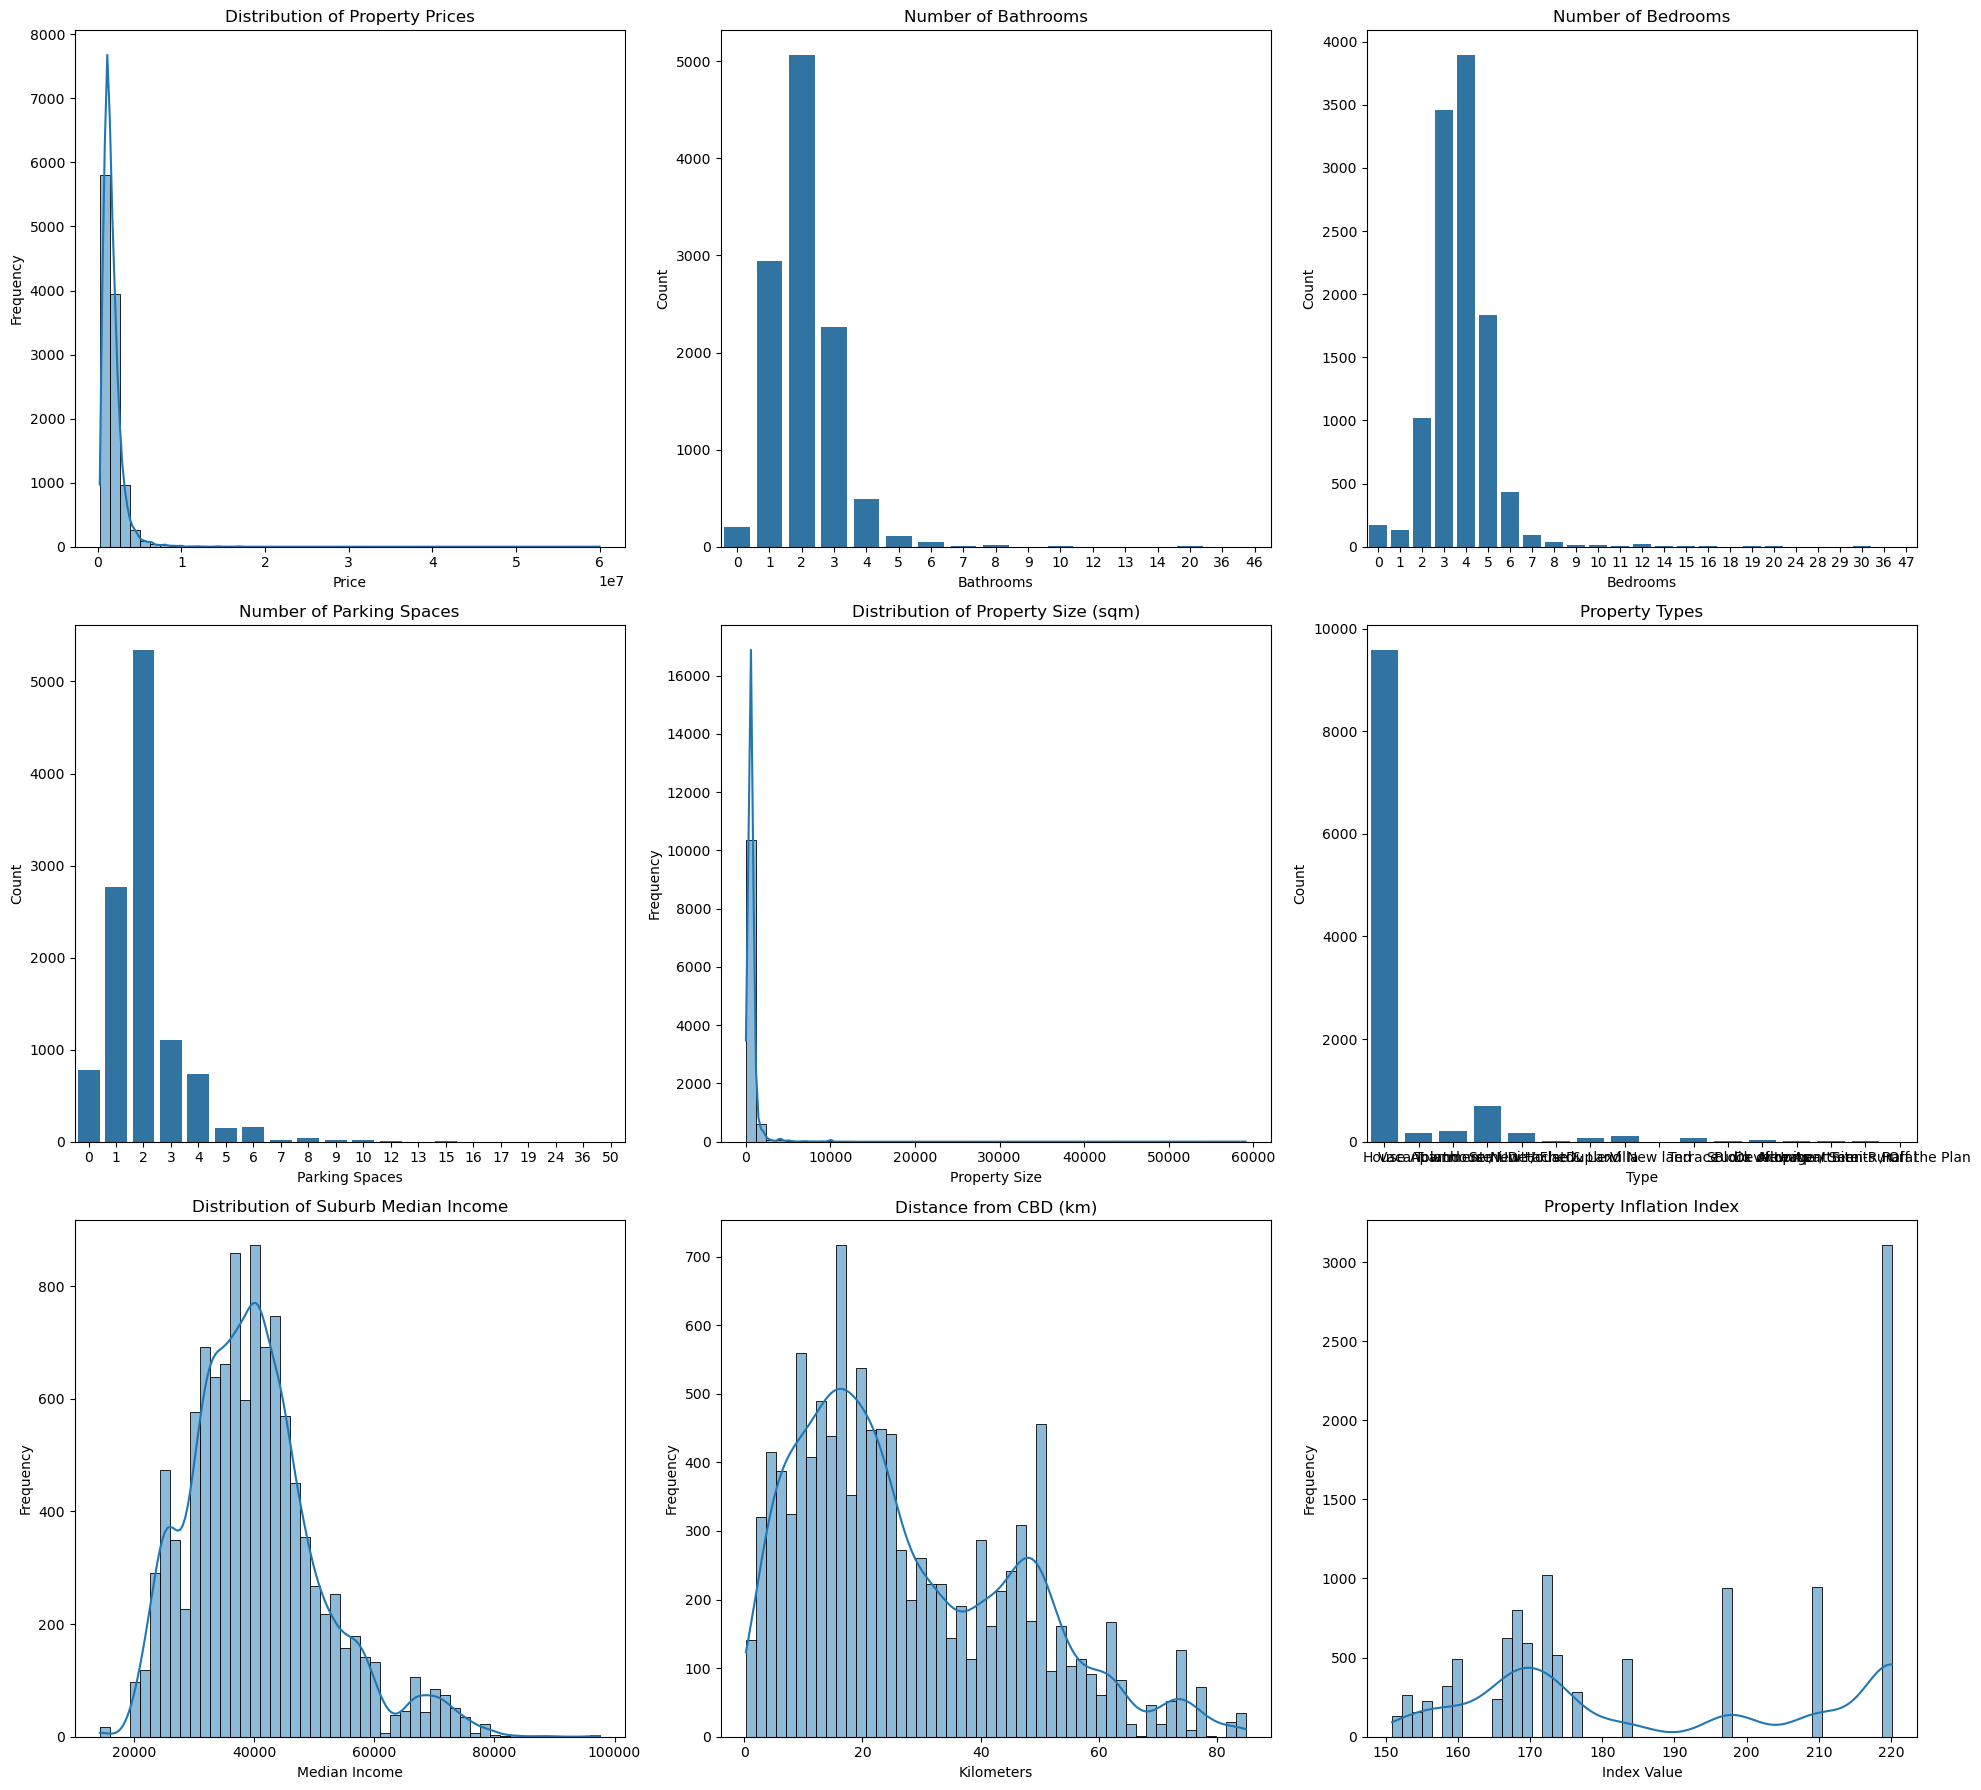

In [9]:
#Visualize distributions for key variables

# Create subplots (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# Plot 1: Distribution of Property Prices
sns.histplot(house_df['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Property Prices")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")

# Plot 2: Number of Bathrooms
sns.countplot(x='num_bath', data=house_df, ax=axes[1])
axes[1].set_title("Number of Bathrooms")
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Count")

# Plot 3: Number of Bedrooms
sns.countplot(x='num_bed', data=house_df, ax=axes[2])
axes[2].set_title("Number of Bedrooms")
axes[2].set_xlabel("Bedrooms")
axes[2].set_ylabel("Count")

# Plot 4: Number of Parking Spaces
sns.countplot(x='num_parking', data=house_df, ax=axes[3])
axes[3].set_title("Number of Parking Spaces")
axes[3].set_xlabel("Parking Spaces")
axes[3].set_ylabel("Count")

# Plot 5: Property Size (sqm)
sns.histplot(house_df['property_size'], bins=50, kde=True, ax=axes[4])
axes[4].set_title("Distribution of Property Size (sqm)")
axes[4].set_xlabel("Property Size")
axes[4].set_ylabel("Frequency")

# Plot 6: Property Types
sns.countplot(x='type', data=house_df, ax=axes[5])
axes[5].set_title("Property Types")
axes[5].set_xlabel("Type")
axes[5].set_ylabel("Count")

# Plot 7: Suburb Median Income
sns.histplot(house_df['suburb_median_income'], bins=50, kde=True, ax=axes[6])
axes[6].set_title("Distribution of Suburb Median Income")
axes[6].set_xlabel("Median Income")
axes[6].set_ylabel("Frequency")

# Plot 8: Distance from CBD
sns.histplot(house_df['km_from_cbd'], bins=50, kde=True, ax=axes[7])
axes[7].set_title("Distance from CBD (km)")
axes[7].set_xlabel("Kilometers")
axes[7].set_ylabel("Frequency")

# Plot 9: Property Inflation Index
sns.histplot(house_df['property_inflation_index'], bins=50, kde=True, ax=axes[8])
axes[8].set_title("Property Inflation Index")
axes[8].set_xlabel("Index Value")
axes[8].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

The visualizations showed that property prices are right-skewed, with most homes priced lower and a few expensive outliers. Most properties have 2–3 bedrooms, 1–2 bathrooms, and limited parking, indicating typical mid-sized homes. Property sizes are diverse but often below 800 sqm. Suburb median income also shows a skewed distribution, suggesting economic diversity. Most listings are houses, and suburbs vary in distance from the CBD. These insights highlight the typical characteristics of Sydney properties and help identify potential outliers and variables that may influence price.

**4.1.4.Bivariate Analysis**

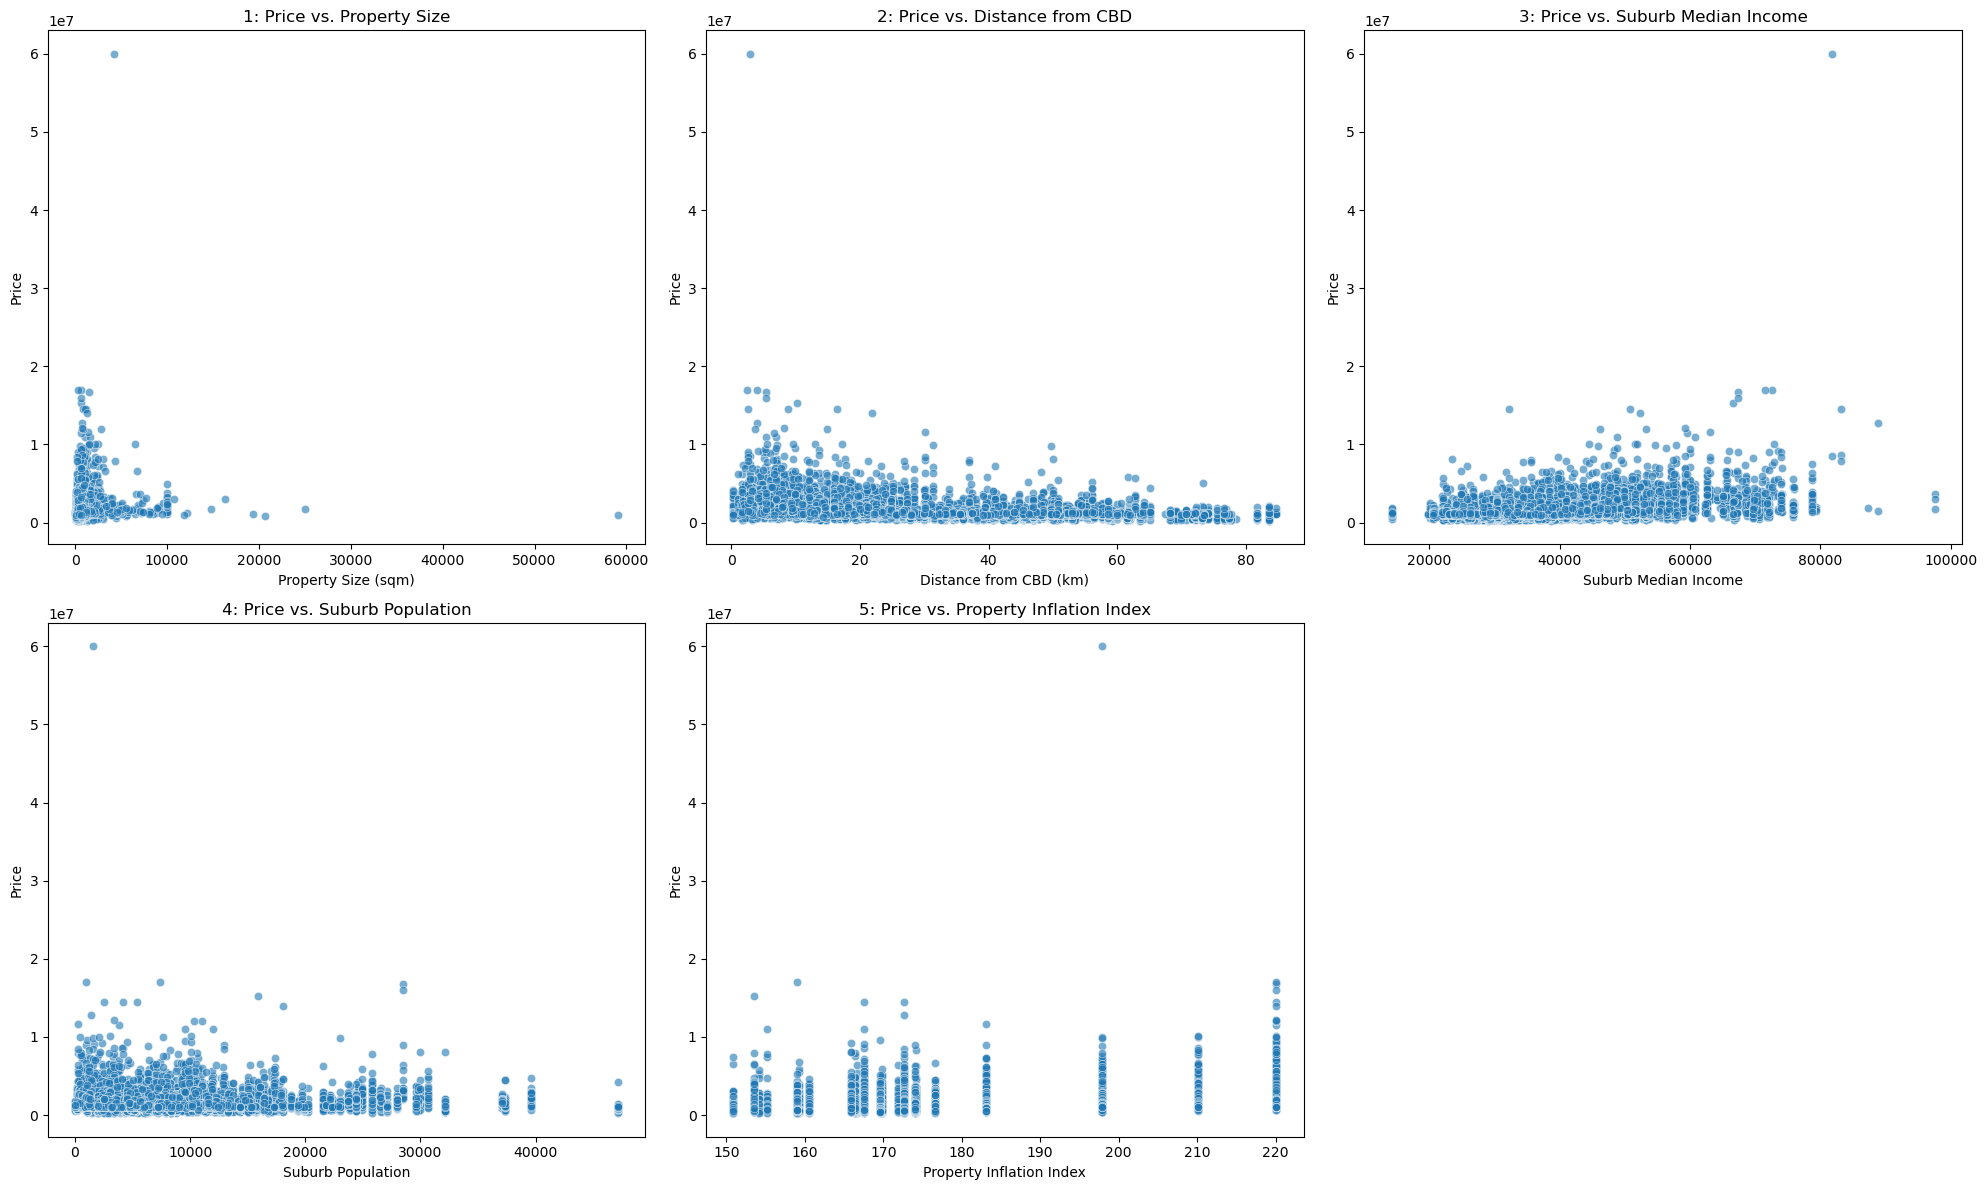

In [10]:
# Numerical vs. Numerical Relationships — Price vs other continuous variables

# Create subplots for 5 scatter plots (2 rows × 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# 1: Price vs. Property Size
sns.scatterplot(x='property_size', y='price', data=house_df, alpha=0.6, ax=axes[0])
axes[0].set_title('1: Price vs. Property Size')
axes[0].set_xlabel('Property Size (sqm)')
axes[0].set_ylabel('Price')
 
# 2: Price vs. Distance from CBD
sns.scatterplot(x='km_from_cbd', y='price', data=house_df, alpha=0.6, ax=axes[1])
axes[1].set_title('2: Price vs. Distance from CBD')
axes[1].set_xlabel('Distance from CBD (km)')
axes[1].set_ylabel('Price')

# 3: Price vs. Suburb Median Income
sns.scatterplot(x='suburb_median_income', y='price', data=house_df, alpha=0.6, ax=axes[2])
axes[2].set_title('3: Price vs. Suburb Median Income')
axes[2].set_xlabel('Suburb Median Income')
axes[2].set_ylabel('Price')

# 4: Price vs. Suburb Population
sns.scatterplot(x='suburb_population', y='price', data=house_df, alpha=0.6, ax=axes[3])
axes[3].set_title('4: Price vs. Suburb Population')
axes[3].set_xlabel('Suburb Population')
axes[3].set_ylabel('Price')

# 5: Price vs. Property Inflation Index
sns.scatterplot(x='property_inflation_index', y='price', data=house_df, alpha=0.6, ax=axes[4])
axes[4].set_title('5: Price vs. Property Inflation Index')
axes[4].set_xlabel('Property Inflation Index')
axes[4].set_ylabel('Price')

# Remove the empty 6th plot area
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()

The scatterplots show weak trends. Larger properties and suburbs with higher median incomes tend to have higher prices, though with many outliers. There is a clearer downward trend in price as distance from the CBD increases, supporting the idea that location impacts value. Suburb population shows little relationship with price. The inflation index has limited variation but may still reflect broader market effects. Overall, these variables provide useful context but may need to be combined with categorical factors or transformed for modeling.

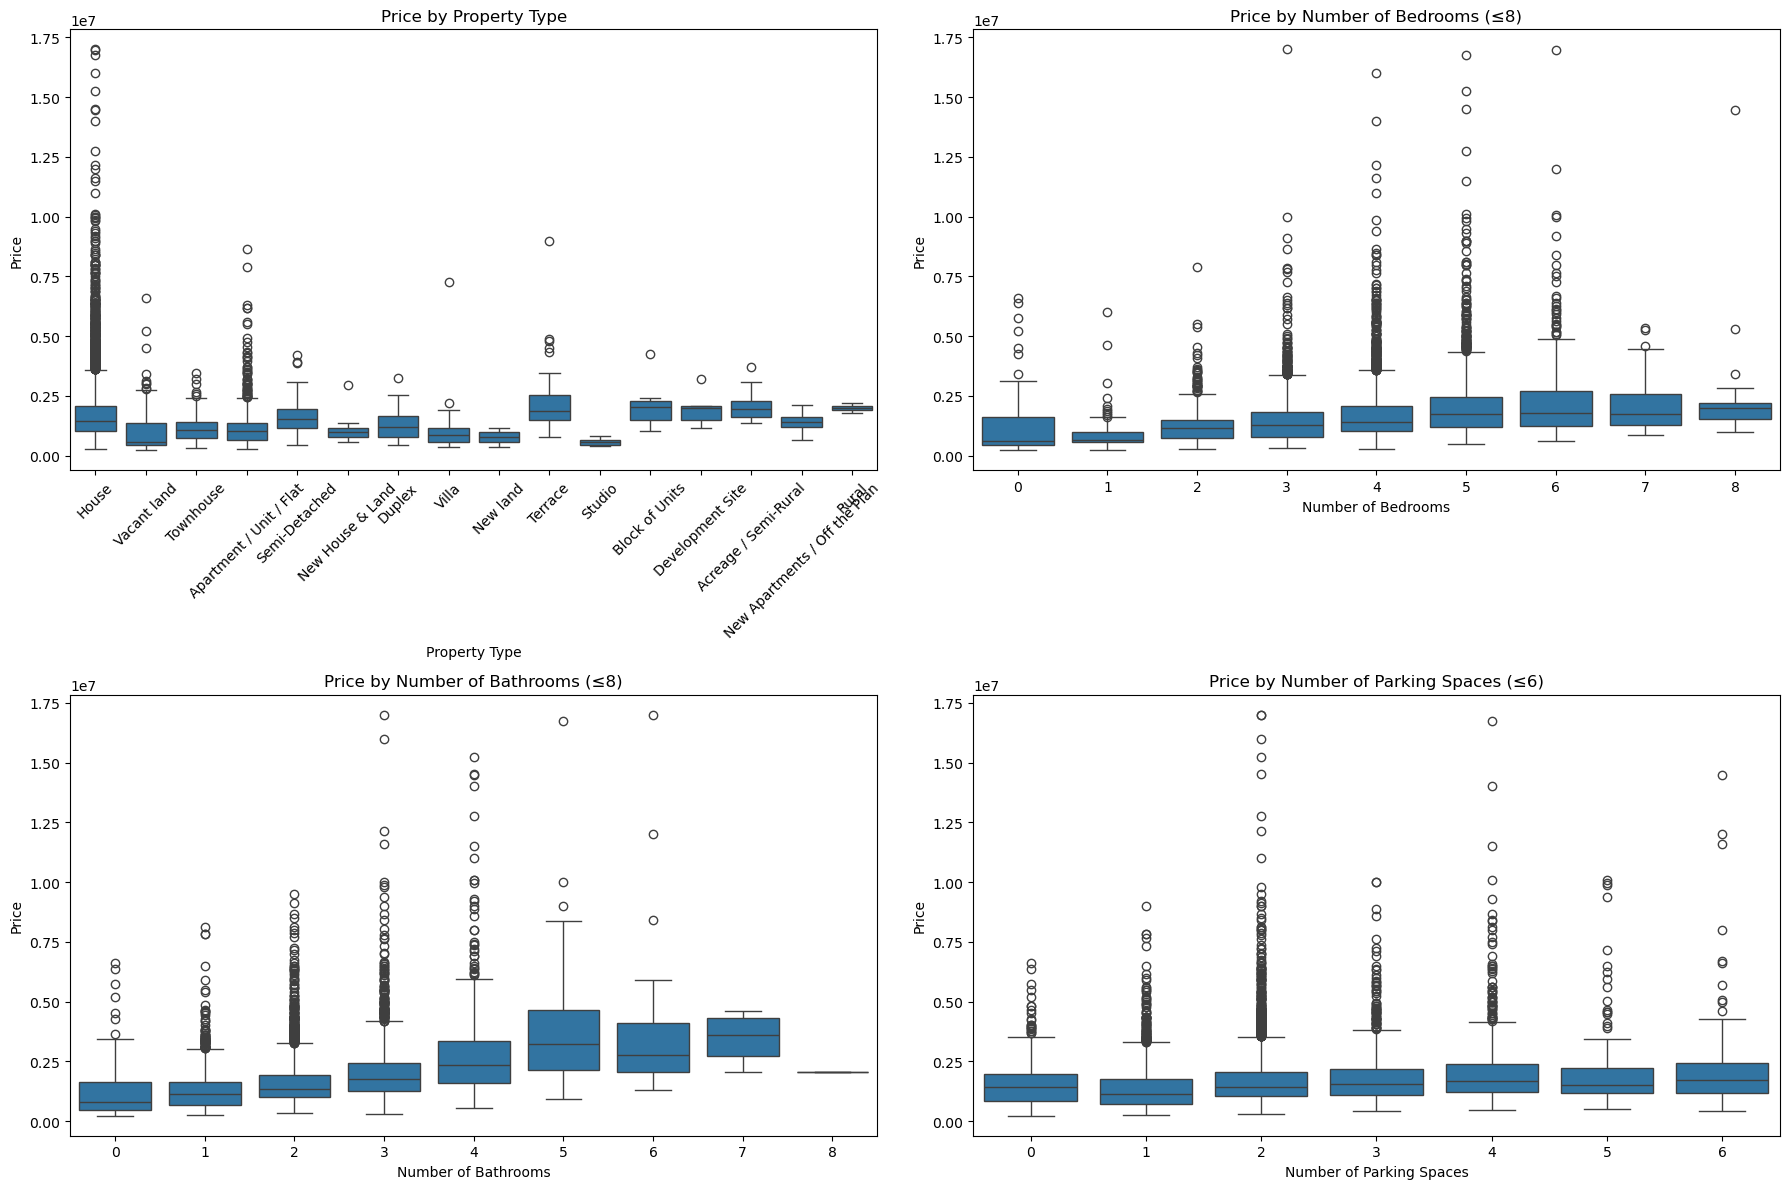

In [11]:
# Categorical vs. Numerical Relationships — Boxplots

# Filter data to exclude extreme values for cleaner plots
filtered_df = house_df[
    (house_df['num_bed'] <= 8) &
    (house_df['num_bath'] <= 8) &
    (house_df['num_parking'] <= 6)
]

# Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Price by Property Type
sns.boxplot(x='type', y='price', data=filtered_df, ax=axes[0])
axes[0].set_title("Price by Property Type")
axes[0].set_xlabel("Property Type")
axes[0].set_ylabel("Price")
axes[0].tick_params(axis='x', rotation=45)

# Price by Number of Bedrooms (capped)
sns.boxplot(x='num_bed', y='price', data=filtered_df, ax=axes[1])
axes[1].set_title("Price by Number of Bedrooms (≤8)")
axes[1].set_xlabel("Number of Bedrooms")
axes[1].set_ylabel("Price")

# Price by Number of Bathrooms (capped)
sns.boxplot(x='num_bath', y='price', data=filtered_df, ax=axes[2])
axes[2].set_title("Price by Number of Bathrooms (≤8)")
axes[2].set_xlabel("Number of Bathrooms")
axes[2].set_ylabel("Price")

# Price by Number of Parking Spaces (capped)
sns.boxplot(x='num_parking', y='price', data=filtered_df, ax=axes[3])
axes[3].set_title("Price by Number of Parking Spaces (≤6)")
axes[3].set_xlabel("Number of Parking Spaces")
axes[3].set_ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()

After limiting extreme values, the boxplots reveal clearer patterns. Houses generally have higher prices compared to other property types. An increase in bedrooms, bathrooms, and parking spaces is associated with higher median prices, though the relationship flattens beyond common values. Outliers still exist, but overall trends are now easier to interpret and visually compare across categories.

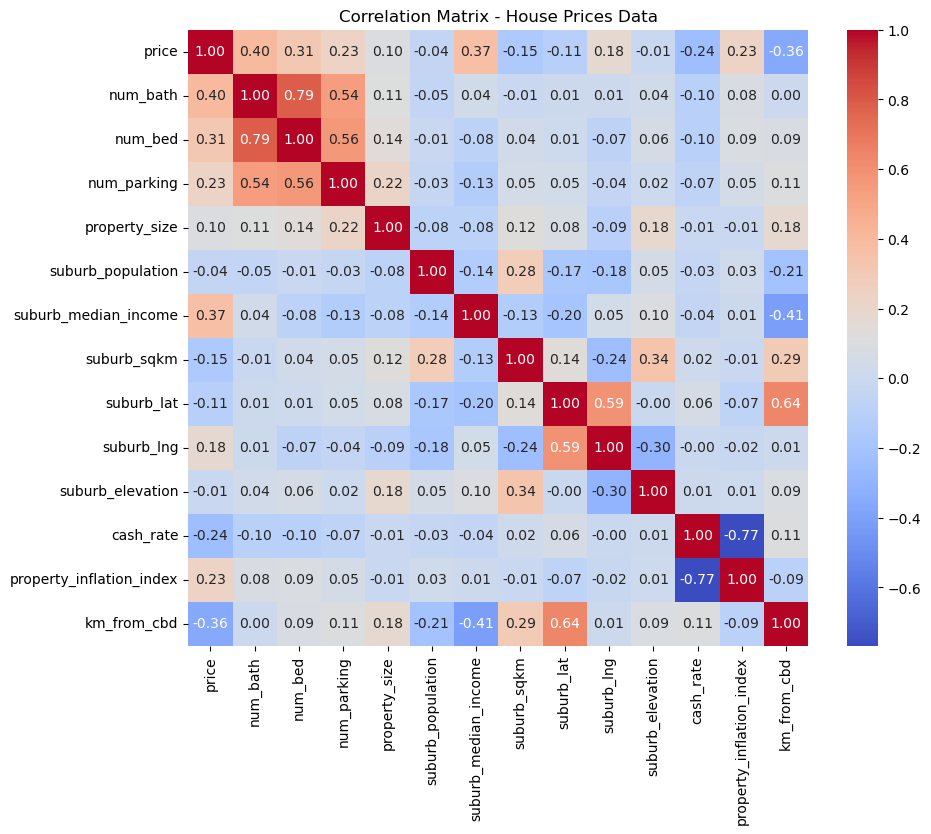

In [12]:
# Select only numeric columns
numeric_df = house_df.select_dtypes(include=['number'])

# Correlation matrix for numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - House Prices Data")
plt.show()

The correlation heatmap shows that price is moderately positively correlated with num_bath (0.40), num_bed (0.31), and suburb_median_income (0.37). As expected, price is negatively correlated with km_from_cbd (−0.36), suggesting properties closer to the city are more expensive. Other variables like property_size and num_parking show weaker correlations. These insights help prioritize variables for predictive modeling and further feature analysis.

**4.1.5. Outlier detection and treatment**

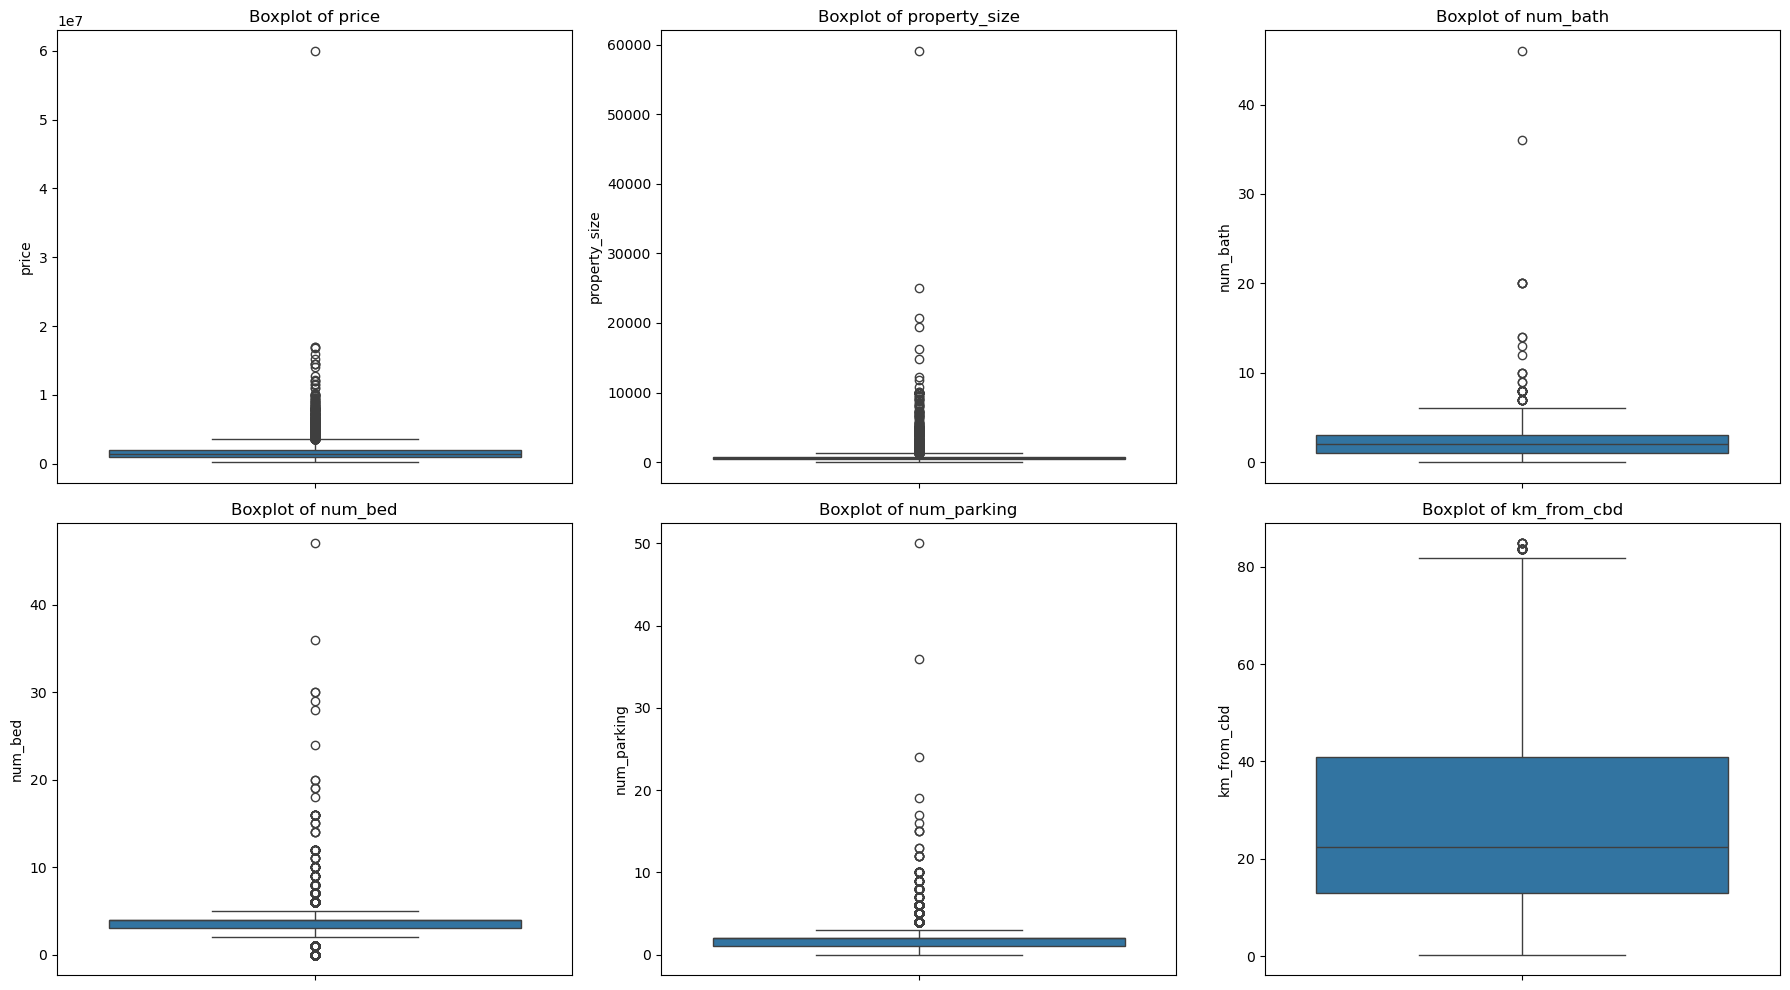

In [13]:
# Boxplots to detect outliers in key numerical features

key_vars = ['price', 'property_size', 'num_bath', 'num_bed', 'num_parking', 'km_from_cbd']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(key_vars):
    sns.boxplot(data=house_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

The boxplots reveal several extreme values across key variables. Notably, price, property_size, and room counts (num_bath, num_bed, num_parking) contain significant outliers far above the typical range. These outliers could skew statistical analyses and modeling results. km_from_cbd shows a wider but less extreme spread. Based on these observations, it is reasonable to cap or filter unrealistic values in the next step to improve data quality and model performance.

In [14]:
# Removing outliers and updating the main dataset

# Define upper limits for outlier removal
house_df = house_df[
    (house_df['price'] <= 5000000) &
    (house_df['property_size'] <= 5000) &
    (house_df['num_bath'] <= 8) &
    (house_df['num_bed'] <= 8) &
    (house_df['num_parking'] <= 6)
]

# Display updated shape
print("Updated house_df shape after outlier removal:", house_df.shape)

Updated house_df shape after outlier removal: (10743, 17)


Outliers in variables such as price, property_size, and room counts were identified through boxplots. These extreme values, likely to be data errors or rare cases, were removed. This cleaning step helps improve the reliability of further analysis and modeling. From this point forward, all analysis uses the cleaned version of the dataset (house_df).

**4.1.6.Data Cleaning**

In [15]:
# Strip whitespace and standardize case in 'suburb' and 'type'
house_df['suburb'] = house_df['suburb'].str.strip().str.title()
house_df['type'] = house_df['type'].str.strip().str.title()

# Drop rows where date parsing failed (if any)
house_df = house_df.dropna(subset=['date_sold'])

# Check and enforce data types
house_df['num_bath'] = house_df['num_bath'].astype(int)
house_df['num_bed'] = house_df['num_bed'].astype(int)
house_df['num_parking'] = house_df['num_parking'].astype(int)

# Reset index
house_df = house_df.reset_index(drop=True)

# Confirm cleaning
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     10743 non-null  int64  
 1   date_sold                 10743 non-null  object 
 2   suburb                    10743 non-null  object 
 3   num_bath                  10743 non-null  int64  
 4   num_bed                   10743 non-null  int64  
 5   num_parking               10743 non-null  int64  
 6   property_size             10743 non-null  int64  
 7   type                      10743 non-null  object 
 8   suburb_population         10743 non-null  int64  
 9   suburb_median_income      10743 non-null  int64  
 10  suburb_sqkm               10743 non-null  float64
 11  suburb_lat                10743 non-null  float64
 12  suburb_lng                10743 non-null  float64
 13  suburb_elevation          10743 non-null  int64  
 14  cash_r

Data cleaning ensured consistency and proper formatting across key fields. Suburb and property type names were standardized, and the date_sold column was successfully converted to datetime format using the correct day-first structure. Data types were checked and adjusted as needed, and the dataset now contains 10,743 clean, non-duplicate, and well-structured records.

**4.1.7. Creating New Features and Transforming Data**

In [16]:
# Convert date_sold to datetime
house_df['date_sold'] = pd.to_datetime(house_df['date_sold'], format='%d/%m/%y', errors='coerce')

# Create separate columns for year and month
house_df['sale_year'] = house_df['date_sold'].dt.year
house_df['sale_month'] = house_df['date_sold'].dt.month

# Log-transform the target variable for normalization
house_df['log_price'] = np.log(house_df['price'])

# Price per square meter (avoid division by zero)
house_df['price_per_sqm'] = house_df['price'] / house_df['property_size']
house_df['price_per_sqm'] = house_df['price_per_sqm'].replace([np.inf, -np.inf], np.nan)

# Bedroom to bathroom ratio (avoid division by zero)
house_df['bed_bath_ratio'] = house_df['num_bed'] / (house_df['num_bath'] + 1)

# Parking to bedroom ratio (avoid division by zero)
house_df['parking_bed_ratio'] = house_df['num_parking'] / (house_df['num_bed'] + 1)


In [17]:
# Check the cleaned DataFrame
house_df.head(12)

price  date_sold         suburb  num_bath  num_bed  num_parking  \
0   530000 2016-01-13      Kincumber         4        4            2   
1   525000 2016-01-13     Halekulani         2        4            2   
2   480000 2016-01-13  Chittaway Bay         2        4            2   
3   452000 2016-01-13        Leumeah         1        3            1   
4   365500 2016-01-13    North Avoca         0        0            0   
5   550000 2016-01-15      Kincumber         1        3            1   
6   535000 2016-01-15      Bensville         1        3            1   
7   495000 2016-01-15        Leumeah         1        3            2   
8   410000 2016-01-15        Toukley         1        3            3   
9   242500 2016-01-15       Winmalee         0        0            0   
10  890000 2016-01-18   Picnic Point         2        4            3   
11  533000 2016-01-18         Whalan         3        4            2   

    property_size         type  suburb_population  suburb_median_income  ...  \
0            1351        House               7093                 29432  ...   
1             594        House               2538                 24752  ...   
2             468        House               2028                 31668  ...   
3             344        House               9835                 32292  ...   
4            1850  Vacant Land               2200                 45084  ...   
5             626        House               7093                 29432  ...   
6             556        House               2545                 36764  ...   
7             582        House               9835                 32292  ...   
8             493        House               4550                 25844  ...   
9            1248  Vacant Land               6202                 38740  ...   
10            715        House               6160                 40560  ...   
11            695        House               5973                 24180  ...   

    suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  \
0                 24        2.0                     150.9        47.05   
1                 23        2.0                     150.9        78.54   
2                  3        2.0                     150.9        63.59   
3                 81        2.0                     150.9        40.12   
4                 18        2.0                     150.9        49.98   
5                 24        2.0                     150.9        47.05   
6                 27        2.0                     150.9        43.91   
7                 81        2.0                     150.9        40.12   
8                  4        2.0                     150.9        74.11   
9                263        2.0                     150.9        59.15   
10                33        2.0                     150.9        22.31   
11                37        2.0                     150.9        39.53   

    sale_year  sale_month  log_price  price_per_sqm  bed_bath_ratio  \
0        2016           1  13.180632     392.301999        0.800000   
1        2016           1  13.171154     883.838384        1.333333   
2        2016           1  13.081541    1025.641026        1.333333   
3        2016           1  13.021437    1313.953488        1.500000   
4        2016           1  12.809022     197.567568        0.000000   
5        2016           1  13.217674     878.594249        1.500000   
6        2016           1  13.190022     962.230216        1.500000   
7        2016           1  13.112313     850.515464        1.500000   
8        2016           1  12.923912     831.643002        1.500000   
9        2016           1  12.398757     194.310897        0.000000   
10       2016           1  13.698977    1244.755245        1.333333   
11       2016           1  13.186277     766.906475        1.000000   

    parking_bed_ratio  
0                0.40  
1                0.40  
2                0.40  
3                0.25  
4                0.0

In this step, several new features were engineered to enhance the property dataset and prepare it for modeling. The sale date was converted to datetime format, and the target variable, property price, was log-transformed to reduce skewness. Additional features such as price per square meter, bedroom-to-bathroom ratio, and parking-to-bedroom ratio were created to capture important structural attributes. Moreover, from date_sold year and month columns were extracted for future merging with crime data set.

**4.1.8. Checking for Data Consistency and Logical Errors**

In [18]:
# Check for unrealistic property feature values
if (house_df['num_bed'] > 10).any():
    print("Properties with more than 10 bedrooms found.")
else:
    print("No properties with more than 10 bedrooms.")

if (house_df['num_bath'] > 10).any():
    print("Properties with more than 10 bathrooms found.")
else:
    print("No properties with more than 10 bathrooms.")

if (house_df['num_parking'] > 8).any():
    print("Properties with more than 8 parking spaces found.")
else:
    print("No properties with more than 8 parking spaces.")

# Check for invalid sale years from a temp reload
temp_df = pd.read_csv("Sydney_house_prices.csv", usecols=["date_sold"])
temp_df['date_sold'] = pd.to_datetime(temp_df['date_sold'], format='%d/%m/%y', errors='coerce')

if ((temp_df['date_sold'].dt.year < 2016) | (temp_df['date_sold'].dt.year > 2021)).any():
    print("Properties sold outside 2016–2021 range found.")
else:
    print("All properties sold within 2016–2021.")

# Check for duplicates
if house_df.duplicated().any():
    print(f"Duplicate rows found: {house_df.duplicated().sum()}")
else:
    print("No duplicate rows found.")

No properties with more than 10 bedrooms.
No properties with more than 10 bathrooms.
No properties with more than 8 parking spaces.
Properties sold outside 2016–2021 range found.
No duplicate rows found.


In [19]:
# Remove records outside 2016–2021

# Re-load and parse dates
temp_dates = pd.read_csv("Sydney_house_prices.csv", usecols=["date_sold"])
temp_dates['date_sold'] = pd.to_datetime(temp_dates['date_sold'], format='%d/%m/%y', errors='coerce')

# Add to house_df as year
house_df['year'] = temp_dates['date_sold'].dt.year

# Filter only valid years
house_df = house_df[(house_df['year'] >= 2016) & (house_df['year'] <= 2021)]

# Drop helper column
house_df.drop(columns=['year'], inplace=True)

This step involves validating the logical integrity of the house prices dataset. Checks are applied to identify uncommon or potentially erroneous values, such as properties with more than 10 bedrooms, bathrooms, or more than 8 parking spaces. Sale dates are also verified to ensure they fall within the study period of 2016–2021. Two records outside this range were deleted. Additionally, the dataset is scanned for duplicate entries that could distort the analysis.

**4.1.9. Preparing and Checking Data for Merging**

In [20]:
# Standardize suburb names: strip whitespace and convert to title case
house_df['suburb'] = house_df['suburb'].str.strip().str.title()

# Check for missing values in merging keys
missing_suburb = house_df['suburb'].isna().sum()
missing_ym = house_df['sale_year'].isna().sum()
missing_ym = house_df['sale_month'].isna().sum()
print(f"Missing suburb values: {missing_suburb}")
print(f"Missing year_month values: {missing_ym}")

# View unique values 
print("\nSample unique suburbs:")
print(house_df['suburb'].unique()[:10])

Missing suburb values: 0
Missing year_month values: 0

Sample unique suburbs:
['Kincumber' 'Halekulani' 'Chittaway Bay' 'Leumeah' 'North Avoca'
 'Bensville' 'Toukley' 'Winmalee' 'Picnic Point' 'Whalan']


To ensure seamless merging with the crime and income datasets, suburb names were cleaned by removing leading and trailing whitespace and converting them to title case. Additionally, meginh keys such as sale_year and sale_month were specified. These two keys along with suburb are the foundation for combining datasets. A check was also performed to confirm that no missing values exist in these fields, maintaining data integrity during the merge process.

### 4.2. NSW Criminal Offences Dataset

**4.2.1. Load Dataset, Select Relevant Time Period (2016–2021), and Perform Initial Data Understanding**  

In [21]:
# Load NSW Criminal Offences data
crime_df = pd.read_csv('Recorded_Incidents_by_Suburb.csv')  
print(f"NSW Criminal Offences by Sydney Suburb: {crime_df.shape}")

NSW Criminal Offences by Sydney Suburb: (279496, 363)


In [22]:
# Choosing the needed data sample from the data set corresponding to the 2016-2021 time interval

# Create list of desired month columns from 2016 to 2021
selected_years = [str(year) for year in range(2016, 2022)]
selected_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
selected_columns = [f"{month} {year}" for year in selected_years for month in selected_months]

# Retain only those columns in the DataFrame while keep identifying columns like Suburb, Offence category, Subcategory
base_columns = ['Suburb', 'Offence category', 'Subcategory']
columns_to_keep = base_columns + [col for col in selected_columns if col in crime_df.columns]

# Filter the DataFrame in place
crime_df = crime_df[columns_to_keep]

# Check shape of the filtered sample
print(f"Filtered crime_df shape: {crime_df.shape}")

Filtered crime_df shape: (279496, 75)


In [23]:
# Check the data types of each column
print("\nData types of each column:\n", crime_df.dtypes)


Data types of each column:
 Suburb              object
Offence category    object
Subcategory         object
Jan 2016             int64
Feb 2016             int64
                     ...  
Aug 2021             int64
Sep 2021             int64
Oct 2021             int64
Nov 2021             int64
Dec 2021             int64
Length: 75, dtype: object


In [24]:
# Display sample data
crime_df.head()

Suburb Offence category                        Subcategory  Jan 2016  \
0  Aarons Pass         Homicide                           Murder *         0   
1  Aarons Pass         Homicide                   Attempted murder         0   
2  Aarons Pass         Homicide       Murder accessory, conspiracy         0   
3  Aarons Pass         Homicide                     Manslaughter *         0   
4  Aarons Pass          Assault  Domestic violence related assault         0   

   Feb 2016  Mar 2016  Apr 2016  May 2016  Jun 2016  Jul 2016  ...  Mar 2021  \
0         0         0         0         0         0         0  ...         0   
1         0         0         0         0         0         0  ...         0   
2         0         0         0         0         0         0  ...         0   
3         0         0         0         0         0         0  ...         0   
4         0         0         0         0         0         0  ...         0   

   Apr 2021  May 2021  Jun 2021  Jul 2021  Aug 2021  Sep 2021  Oct 2021  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Nov 2021  Dec 2021  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 75 columns]

The NSW Criminal Offences dataset was filtered to retain only the monthly crime records from January 2016 to December 2021, aligning with the analysis timeframe of the house price data. The filltered dataset includes 279,496 rows and 75 columns, with each row corresponding to a unique combination of suburb, offence category, and subcategory. Monthly offence counts are stored across 72 columns, each named by month.

**4.2.3. Data Reorganisation**

In [25]:
# Identify the 72 month columns (e.g. "Jan 2016", "Feb 2016", …, "Dec 2021")
month_pattern = re.compile(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{4}$')
month_cols = [col for col in crime_df.columns if month_pattern.match(col)]

# Melt to long form: one row per (Suburb × Offence category × Subcategory × Month)
crime_long = crime_df.melt(
    id_vars=['Suburb', 'Offence category', 'Subcategory'],
    value_vars=month_cols,
    var_name='YearMonth',
    value_name='Count'
)

# Parse YearMonth into Year and Month integers
crime_long['YearMonth'] = pd.to_datetime(crime_long['YearMonth'], format='%b %Y')
crime_long['Year']      = crime_long['YearMonth'].dt.year
crime_long['Month']     = crime_long['YearMonth'].dt.month

# Aggregate counts by Suburb × Year × Month × Offence category
grouped = (
    crime_long
    .groupby(['Suburb', 'Year', 'Month', 'Offence category'], as_index=False)['Count']
    .sum()
)

# Pivot so each offence category is its own column
pivot_df = grouped.pivot_table(
    index=['Suburb', 'Year', 'Month'],
    columns='Offence category',
    values='Count',
    fill_value=0
).reset_index()
pivot_df.columns.name = None

# Compute Monthly_Total (sum across all offence columns)
offence_cols = [c for c in pivot_df.columns if c not in ['Suburb', 'Year', 'Month']]
pivot_df['Monthly_Total'] = pivot_df[offence_cols].sum(axis=1)

# Compute Yearly_Total per Suburb × Year
yearly_totals = (
    pivot_df
    .groupby(['Suburb', 'Year'], as_index=False)['Monthly_Total']
    .sum()
    .rename(columns={'Monthly_Total': 'Yearly_Total'})
)

# Overwrite crime_df with the processed DataFrame
crime_df = pivot_df.merge(yearly_totals, on=['Suburb', 'Year'])

# Sanity checks
subs = crime_df['Suburb'].nunique()
assert crime_df.shape[0] == subs * 6 * 12, f"Expected {subs*6*12} rows, got {crime_df.shape[0]}"
assert crime_df.groupby(['Suburb', 'Year']).size().eq(12).all(), "Each Suburb-Year should have 12 months"


In [26]:
# Display the resulted Data Frame
crime_df.head()

Suburb  Year  Month  Abduction and kidnapping  \
0  Aarons Pass  2016      1                       0.0   
1  Aarons Pass  2016      2                       0.0   
2  Aarons Pass  2016      3                       0.0   
3  Aarons Pass  2016      4                       0.0   
4  Aarons Pass  2016      5                       0.0   

   Against justice procedures  Arson  Assault  Betting and gaming offences  \
0                         0.0    0.0      0.0                          0.0   
1                         0.0    0.0      0.0                          0.0   
2                         0.0    0.0      0.0                          0.0   
3                         0.0    0.0      0.0                          0.0   
4                         0.0    0.0      0.0                          0.0   

   Blackmail and extortion  Coercive Control  ...  Other offences  \
0                      0.0               0.0  ...             0.0   
1                      0.0               0.0  ...             0.0   
2                      0.0               0.0  ...             0.0   
3                      0.0               0.0  ...             0.0   
4                      0.0               0.0  ...             0.0   

   Other offences against the person  Pornography offences  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   

   Prohibited and regulated weapons offences  Robbery  Sexual offences  Theft  \
0                                        0.0      0.0              0.0    0.0   
1                                        0.0      0.0              0.0    1.0   
2                                        0.0      0.0              0.0    0.0   
3                                        0.0      0.0              0.0    1.0   
4                                        0.0      0.0              0.0    0.0   

   Transport regulatory offences  Monthly_Total  Yearly_Total  
0                            0.0            0.0           4.0  
1                            0.0            1.0           4.0  
2                            0.0            0.0           4.0  
3                            0.0            1.0           4.0  
4                            0.0            0.0           4.0  

[5 rows x 26 columns]

To facilitate meaningful analysis of how crime affects residential house prices across Sydney suburbs, the crime dataset was transformed into a structured format where each row represents a specific suburb, year, and month, with columns for each broad offence category. Instead of using offence subcategories, the broader offence category level was retained to reduce dimensionality and avoid sparsity in the data. Many subcategories contain very few incidents, leading to numerous zero entries and increasing the risk of overfitting or noise in predictive models. In contrast, offence categories are more stable and interpretable, and they capture the general trends needed for understanding crime’s impact on property values. The final dataframe also includes monthly and yearly total crime counts per suburb, which provide additional aggregate indicators to capture overall criminal activity and its possible correlation with house pricing.

**4.2.3. Variable Identification**  

In [27]:
# Check basic structure of the dataset
print("NSW Criminal Offences by Sydney Suburb basic dataset info:")
crime_df.info()

NSW Criminal Offences by Sydney Suburb basic dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324576 entries, 0 to 324575
Data columns (total 26 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Suburb                                     324576 non-null  object 
 1   Year                                       324576 non-null  int32  
 2   Month                                      324576 non-null  int32  
 3   Abduction and kidnapping                   324576 non-null  float64
 4   Against justice procedures                 324576 non-null  float64
 5   Arson                                      324576 non-null  float64
 6   Assault                                    324576 non-null  float64
 7   Betting and gaming offences                324576 non-null  float64
 8   Blackmail and extortion                    324576 non-null  float64
 9   Coercive Control      

In [28]:
# Display all column names
print("All columns in crime_df:")
print(crime_df.columns.tolist())


All columns in crime_df:
['Suburb', 'Year', 'Month', 'Abduction and kidnapping', 'Against justice procedures', 'Arson', 'Assault', 'Betting and gaming offences', 'Blackmail and extortion', 'Coercive Control', 'Disorderly conduct', 'Drug offences', 'Homicide', 'Intimidation, stalking and harassment', 'Liquor offences', 'Malicious damage to property', 'Other offences', 'Other offences against the person', 'Pornography offences', 'Prohibited and regulated weapons offences', 'Robbery', 'Sexual offences', 'Theft', 'Transport regulatory offences', 'Monthly_Total', 'Yearly_Total']


In [29]:
# Identify categorical and numeric columns 

# Categorical/time columns
categorical_cols = ['Suburb', 'Month', 'Year']

# Numeric columns: all others
numeric_cols = crime_df.columns.difference(categorical_cols).tolist()

print("\nCategorical Columns:")
print(categorical_cols)

print("\nNumeric Columns (crime categories and totals):")
print(numeric_cols)


Categorical Columns:
['Suburb', 'Month', 'Year']

Numeric Columns (crime categories and totals):
['Abduction and kidnapping', 'Against justice procedures', 'Arson', 'Assault', 'Betting and gaming offences', 'Blackmail and extortion', 'Coercive Control', 'Disorderly conduct', 'Drug offences', 'Homicide', 'Intimidation, stalking and harassment', 'Liquor offences', 'Malicious damage to property', 'Monthly_Total', 'Other offences', 'Other offences against the person', 'Pornography offences', 'Prohibited and regulated weapons offences', 'Robbery', 'Sexual offences', 'Theft', 'Transport regulatory offences', 'Yearly_Total']


The final crime dataset consists of 324,576 rows and 26 columns, capturing monthly criminal offence counts across Sydney suburbs from 2016 to 2021. Each row represents a unique combination of suburb and month (YearMonth), with crime counts provided for broad offence categories. Three categorical variables were identified: Suburb, YearMonth, and Year. The remaining 23 columns are numeric, including offence-specific counts and two aggregate measures: Monthly_Total and Yearly_Total, which represent the total number of crimes in a suburb during a given month and year, respectively. This structure provides a clean, time-indexed view suitable for merging with house price data and for analyzing trends over time or across locations.

**4.2.4.  Univariate Analysis**  

In [30]:
# Identify crime-related columns
exclude_cols = ['Suburb', 'Year', 'Month', 'Monthly_Total', 'Yearly_Total']
crime_columns = [col for col in crime_df.columns if col not in exclude_cols]


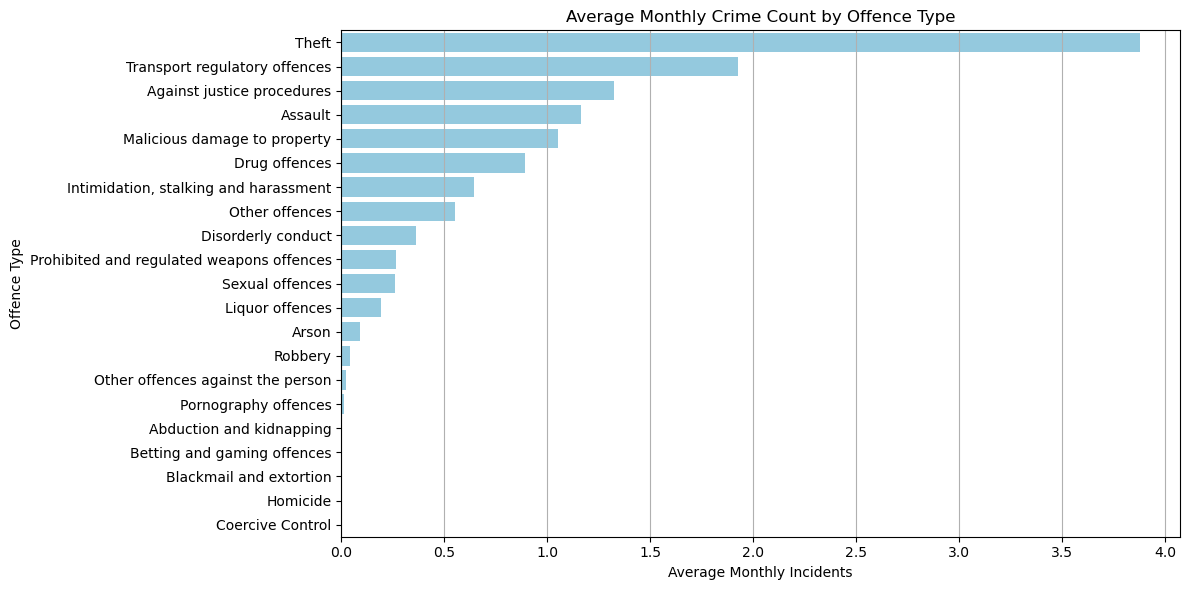

In [31]:
# Average monthly crime count per offence type

avg_monthly_crime = crime_df[crime_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_monthly_crime.values,
    y=avg_monthly_crime.index,
    color="skyblue",
    legend=False 
)
plt.title("Average Monthly Crime Count by Offence Type")
plt.xlabel("Average Monthly Incidents")
plt.ylabel("Offence Type")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

The horizontal bar chart ranks offences by mean incidents per suburb–month. Theft leads at nearly four incidents on average, followed by Transport regulatory offences (≈2) and Against justice procedures (≈1.3). Mid-frequency crimes—Assault, Malicious damage, and Drug offences—cluster around 0.8–1.2, while the rarest offences (Arson, Robbery, Homicide, Coercive control, etc.) average under 0.1 incidents. This ordering makes clear which crime categories contribute most heavily to the overall monthly burden.

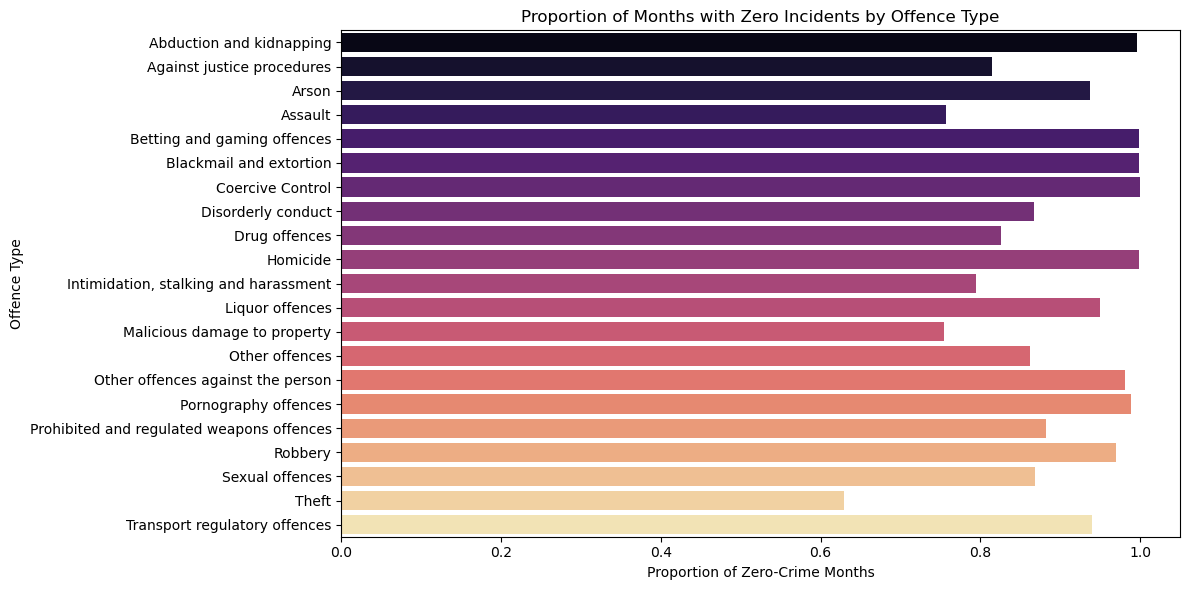

In [32]:
# Proportion of zero-crime months per offence type
zero_crime_prop = (crime_df[crime_columns] == 0).sum() / len(crime_df)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=zero_crime_prop.values,
    y=zero_crime_prop.index,
    hue=zero_crime_prop.index,   # explicitly map hue to the same variable as y
    palette="magma",
    dodge=False,
    legend=False
)

plt.title("Proportion of Months with Zero Incidents by Offence Type")
plt.xlabel("Proportion of Zero-Crime Months")
plt.ylabel("Offence Type")
plt.tight_layout()
plt.show()

Bars are scaled so that each offence category’s highest single-month total equals 1.0. Offences such as Homicide, Betting & gaming, Blackmail & extortion, and Coercive control each reach the overall maximum peak, whereas rarer crimes like Abduction & kidnapping and Pornography offences remain far below that level even at their monthly highs. This visualization highlights which offence types are capable of producing the largest monthly surges.

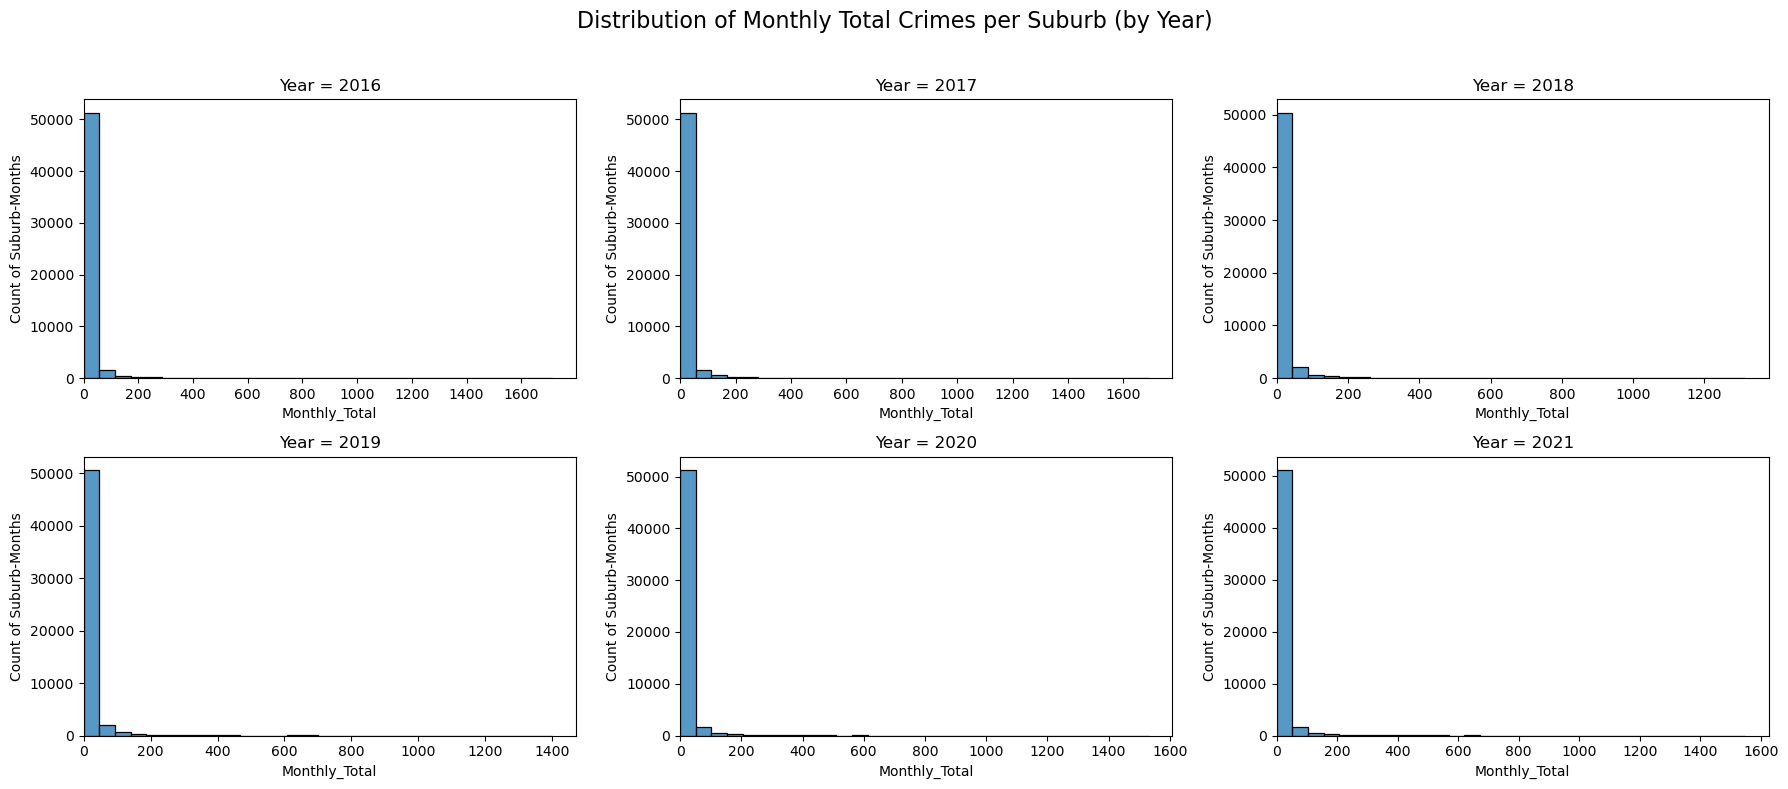

In [33]:
# set up a 2×3 grid of subplots (6 years)
years = sorted(crime_df['Year'].unique())
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=False, sharey=False)

for ax, year in zip(axes.flatten(), years):
    subset = crime_df[crime_df['Year'] == year]
    sns.histplot(
        subset['Monthly_Total'],
        bins=30,
        kde=False,
        ax=ax
    )
    ax.set_title(f"Year = {year}")
    ax.set_xlabel("Monthly_Total")
    ax.set_ylabel("Count of Suburb-Months")
    ax.set_xlim(0, subset['Monthly_Total'].max() * 1.05)

plt.suptitle("Distribution of Monthly Total Crimes per Suburb (by Year)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Each of the six histograms (2016–2021) displays a pronounced right-skew in monthly crime totals across suburbs. Most suburb–month combinations record relatively few incidents, while a small number of outliers stretch beyond several hundred. The consistency of this heavy-tail shape from year to year suggests that occasional high-crime months coexist with predominantly low-crime ones throughout the period.

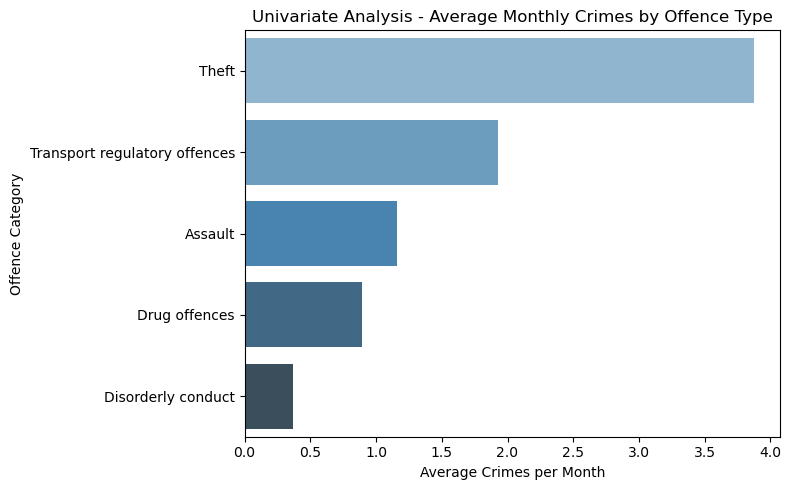

In [34]:
# Top 5 Most Common Offence Categories (mean per month)
offence_categories = [
    'Assault', 'Theft', 'Drug offences', 'Robbery', 'Homicide',
    'Disorderly conduct', 'Sexual offences', 'Transport regulatory offences'
]

offence_means = crime_df[offence_categories].mean().sort_values(ascending=False).head(5)

# Convert to DataFrame for proper barplot
offence_df = offence_means.reset_index()
offence_df.columns = ['Offence', 'Average_Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=offence_df, x='Average_Count', y='Offence', palette='Blues_d', hue='Offence', legend=False)
plt.title("Univariate Analysis - Average Monthly Crimes by Offence Type")
plt.xlabel("Average Crimes per Month")
plt.ylabel("Offence Category")
plt.tight_layout()
plt.show()

The bar chart shows that Theft is the most common offence across Sydney suburbs, averaging nearly 4 incidents per month, followed by Transport regulatory offences and Assault. This suggests property-related crimes and traffic offences are more widespread than violent or drug-related crimes. The comparatively lower frequencies of Drug offences and Disorderly conduct indicate these are less consistently reported across suburbs. These patterns highlight the dominant role of theft and transport-related incidents in shaping overall crime trends, making them particularly relevant for understanding neighbourhood safety and potential impacts on property values.

**4.2.5. Bivariate Analysis**  

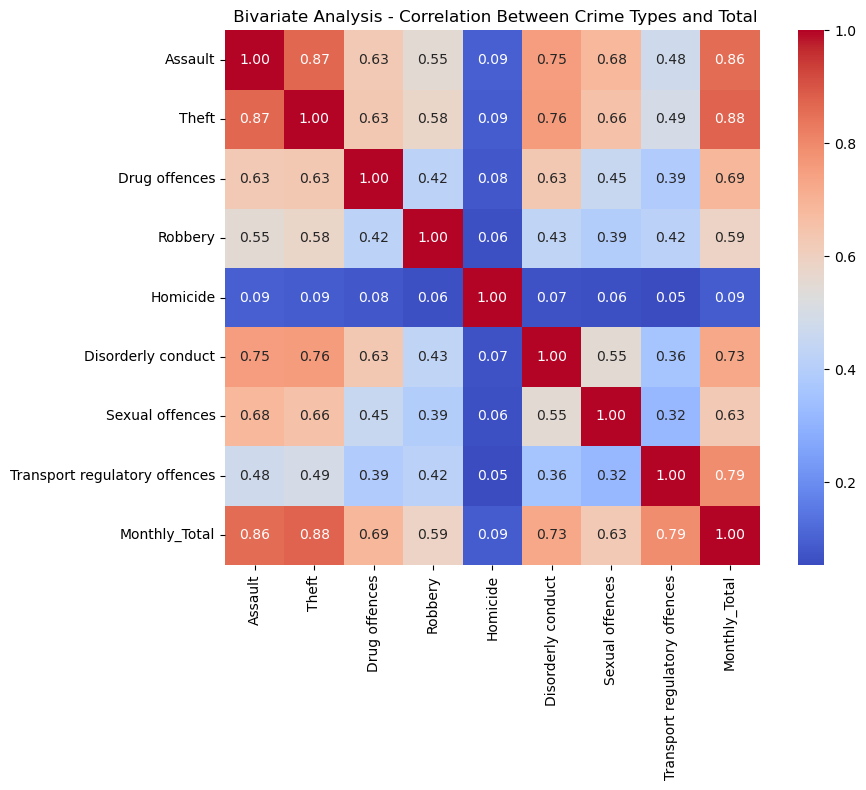

In [35]:
# Correlation heatmap between selected crime categories and Monthly_Total
selected_offences = [
    'Assault', 'Theft', 'Drug offences', 'Robbery',
    'Homicide', 'Disorderly conduct', 'Sexual offences',
    'Transport regulatory offences', 'Monthly_Total'
]

# Compute correlation matrix
corr_matrix = crime_df[selected_offences].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(" Bivariate Analysis - Correlation Between Crime Types and Total")
plt.tight_layout()
plt.show()

The heatmap presents the correlation between major crime categories and the total monthly crime count across suburbs. Notably, Theft and Assault show the strongest positive correlations with Monthly_Total (0.88 and 0.86 respectively), indicating they are the key drivers of overall crime levels. Disorderly conduct and Transport regulatory offences also show strong correlations (0.73 and 0.79), suggesting their frequent occurrence contributes significantly to crime totals. In contrast, Homicide, Robbery, and Sexual offences show very low correlations with Monthly_Total (all below 0.10), reflecting their rarity and lesser impact on total monthly figures. These results highlight that while serious crimes are important socially, it's the more frequent and widespread offences that dominate monthly crime statistics and may more directly influence public perception and local conditions.

In [36]:
# Ensure Monthly_Total is numeric
crime_df['Monthly_Total'] = pd.to_numeric(crime_df['Monthly_Total'], errors='coerce')

#  Create a proper datetime for time‐series plots
crime_df['YearMonth'] = pd.to_datetime(
    crime_df['Year'].astype(str)
    + '-'
    + crime_df['Month'].astype(str).str.zfill(2)
    + '-01'
)

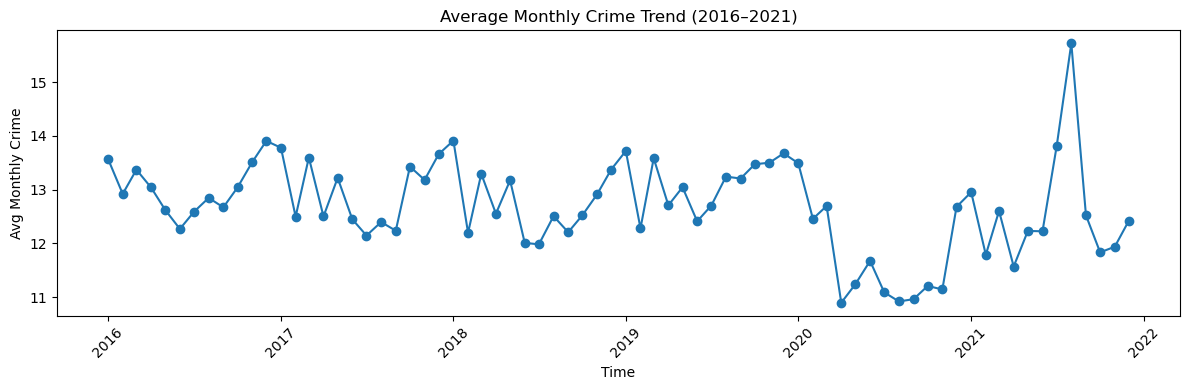

In [37]:
# Trend: average monthly crime over time —
avg_trend = (
    crime_df
    .groupby('YearMonth')['Monthly_Total']
    .mean()
)
plt.figure(figsize=(12, 4))
plt.plot(avg_trend.index, avg_trend.values, marker='o')
plt.xlabel('Time')
plt.ylabel('Avg Monthly Crime')
plt.title('Average Monthly Crime Trend (2016–2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Over the six-year span, the average monthly crime rate hovers around 12–14 incidents per month, exhibiting a clear cyclical up-and-down pattern each year. You can see small peaks early in each calendar year followed by troughs mid-year. Notably, there’s a sharp dip to around 11 incidents in mid-2020—likely reflecting COVID-related lockdowns—followed by a gradual recovery. By mid-2021 the average briefly spikes above 15 before settling back toward the historical range.

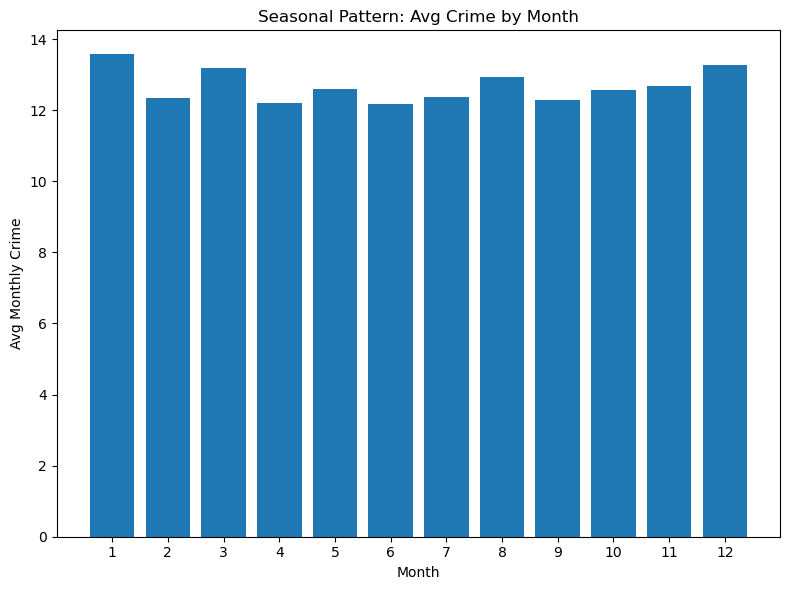

In [38]:
# Seasonal pattern by calendar month 
avg_by_month = (
    crime_df
    .groupby('Month')['Monthly_Total']
    .mean()
    .reindex(range(1, 13))
)
plt.figure(figsize=(8, 6))
plt.bar(avg_by_month.index, avg_by_month.values)
plt.xlabel('Month')
plt.ylabel('Avg Monthly Crime')
plt.title('Seasonal Pattern: Avg Crime by Month')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

Across all years, the highest average crime levels appear in the peak-summer months of January (≈13.6) and March (≈13.2), then decline through the cooler months, reaching lows around April and June (≈12.2). Secondary increases emerge in August (≈12.9) and December (≈13.3), suggesting modest holiday-season effects, while autumn and early-winter months exhibit the lowest typical totals.

**4.2.6. Handling Missing Values**  

In [39]:
# Check for missing values
missing_summary = crime_df.isnull().sum()
missing_total = missing_summary.sum()

# Display results
print("Missing values by column:\n", missing_summary[missing_summary > 0])
print(f"\nTotal missing values in the dataset: {missing_total}")

Missing values by column:
 Series([], dtype: int64)

Total missing values in the dataset: 0


No missing values were detected in the NSW Criminal Offences dataset

**4.2.7. Outlier Detection and Data Cleaning**  

In [40]:
# Make sure Monthly_Total & all offence cols are numeric
crime_df['Monthly_Total'] = pd.to_numeric(crime_df['Monthly_Total'], errors='coerce')

offence_cols = [
    c for c in crime_df.columns
    if c not in ['Suburb','Year','Month','YearMonth','Monthly_Total','Yearly_Total']
]
crime_df[offence_cols] = crime_df[offence_cols].apply(pd.to_numeric, errors='coerce')

numeric_cols = ['Monthly_Total'] + offence_cols

# Compute IQR bounds
Q1 = crime_df[numeric_cols].quantile(0.25)
Q3 = crime_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Flag outliers
outlier_flags = (crime_df[numeric_cols] < lower) | (crime_df[numeric_cols] > upper)

# Total outlier rows per column
total_outliers = outlier_flags.sum()

# Unique suburbs with ≥1 outlier per column
unique_suburbs = {
    col: crime_df.loc[outlier_flags[col], 'Suburb'].nunique()
    for col in numeric_cols
}
unique_suburbs = pd.Series(unique_suburbs)

# % of all suburbs affected
total_suburbs = crime_df['Suburb'].nunique()
pct_suburbs = (unique_suburbs / total_suburbs * 100).round(1)

# Print results
print("Total outlier rows per column:")
print(total_outliers, "\n")
print("Number of unique suburbs with ≥1 outlier:")
print(unique_suburbs, "\n")
print(f"Of {total_suburbs} suburbs, percent impacted:")
print(pct_suburbs)


Total outlier rows per column:
Monthly_Total                                55197
Abduction and kidnapping                      1212
Against justice procedures                   60018
Arson                                        20540
Assault                                      78722
Betting and gaming offences                    313
Blackmail and extortion                        589
Coercive Control                                 0
Disorderly conduct                           43053
Drug offences                                56558
Homicide                                       547
Intimidation, stalking and harassment        66483
Liquor offences                              16406
Malicious damage to property                 79828
Other offences                               44773
Other offences against the person             6104
Pornography offences                          3848
Prohibited and regulated weapons offences    38180
Robbery                                       9866


Text(0, 0.5, 'Frequency')

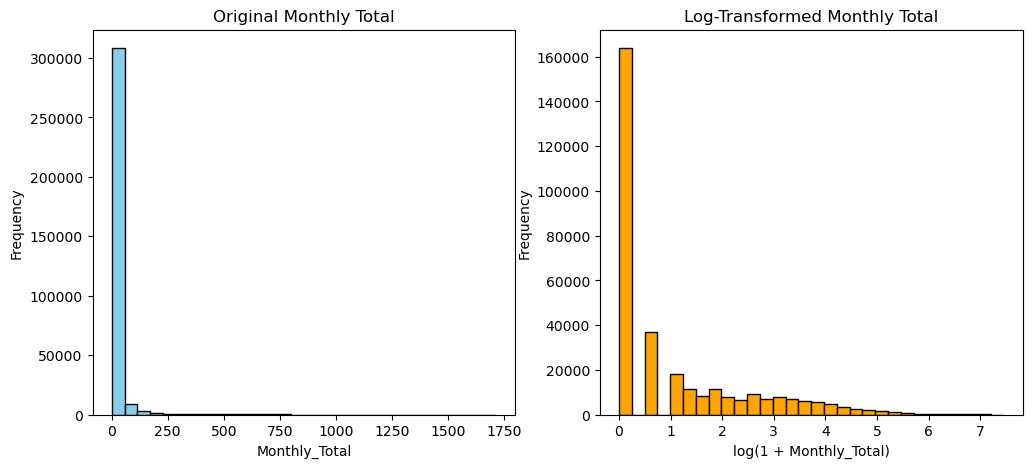

In [41]:
# Apply log transformation 
crime_df['log_monthly_total'] = np.log1p(crime_df['Monthly_Total'])

# Plot histograms side by side
plt.figure(figsize=(12, 5))

# Original Monthly_Total
plt.subplot(1, 2, 1)
plt.hist(crime_df['Monthly_Total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Original Monthly Total')
plt.xlabel('Monthly_Total')
plt.ylabel('Frequency')

# Log-transformed Monthly_Total
plt.subplot(1, 2, 2)
plt.hist(crime_df['log_monthly_total'], bins=30, color='orange', edgecolor='black')
plt.title('Log-Transformed Monthly Total')
plt.xlabel('log(1 + Monthly_Total)')
plt.ylabel('Frequency')

Outlier detection on the Monthly_Total series flagged more than 55 000 month–suburb observations as extreme (using the 1.5 × IQR rule), with raw values reaching up to nearly 1 700 incidents in a single month. The histograms clearly demonstrate the necessity of applying a log transformation to the Monthly_Total crime data. The original distribution (left) is extremely right-skewed, with the vast majority of observations concentrated at very low values and a long tail of extreme outliers. This kind of skew can distort statistical analysis and lead to biased model estimates. After applying the log transformation (right), the data becomes more spread out and better balanced, reducing the influence of outliers. This transformation is crucial for meeting assumptions of common statistical models and improving interpretability and model performance.

**4.2.8. Creating New Features and Transforming Data**

By the end of Step 3 the raw crime DataFrame had already been reshaped into a fully informative format: the Year and Month columns were identifyed from the intial long format, all offence‐count fields were coerced to numeric types, and missing suburb–month combinations were handled so that every period aligned correctly. This early transformation was crucial—without it the initial table of 72 repeated records per suburb, inconsistent types, and scattered date information would have made any downstream analysis or merge with the house‐sales data unreliable and opaque. With the data standardized at the outset, subsequent exploratory plots and regression models can proceed on a clean, meaningful time‐series foundation.

**4.2.9. Checking for Data Consistency and Logical Errors**

In [42]:
# Check for negative monthly crime counts
negative_monthly = crime_df[crime_df['Monthly_Total'] < 0]
print(f"Total negative values in Monthly_total: {len(negative_monthly)}")
if not negative_monthly.empty:
    display(negative_monthly.head())


# Check for negative yearly crime counts
negative_yearly = crime_df[crime_df['Yearly_Total'] < 0]
print(f"Total negative values in Yearly_total: {len(negative_yearly)}")
if not negative_yearly.empty:
    display(negative_yearly.head())

Total negative values in Monthly_total: 0
Total negative values in Yearly_total: 0


In [43]:
# Ensure year_month is within the expected time range (2016–2021)
invalid_dates = crime_df[
    (crime_df['Year'] < 2016) | 
    (crime_df['Year']> 2021)
]
print(f"Records with invalid year_month range: {len(invalid_dates)}")
if not invalid_dates.empty:
    display(invalid_dates.head())

Records with invalid year_month range: 0


In [44]:
# Check for missing values in key columns (Suburb, Subcategory, year_month, crime_count)
missing_summary = crime_df[['Suburb', 'YearMonth', 'Monthly_Total', 'Yearly_Total']].isnull().sum()
print("Missing values in key columns:\n", missing_summary)

Missing values in key columns:
 Suburb           0
YearMonth        0
Monthly_Total    0
Yearly_Total     0
dtype: int64


In [45]:
# Check for duplicate records
duplicate_rows = crime_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In this step, the dataset was examined for logical inconsistencies and data integrity issues. Specifically, checks were performed to ensure that all year and month values were correctly parsed as dates and that the crime counts were non-negative and consistent with expectations. The review confirmed that there were no invalid dates, no duplicate rows in the long format, and no negative crime values. This suggests that the data is logically sound and ready for further processing.

**4.2.10. Preparing and Checking Data for Merging**

In [46]:
# Standardize suburb names: strip whitespace and convert to title case
crime_df['Suburb'] = crime_df['Suburb'].str.strip().str.title()

# Check for missing values in merge keys
missing_suburb = crime_df['Suburb'].isnull().sum()
missing_year= crime_df['Year'].isnull().sum()
missing_month = crime_df['Month'].isnull().sum()

print(f"Missing suburb values: {missing_suburb}")
print(f"Missing year and month values: {missing_year, missing_month}")

# Preview unique values
print("\nSample unique suburbs:")
print(crime_df['Suburb'].dropna().unique()[:10])

Missing suburb values: 0
Missing year and month values: (np.int64(0), np.int64(0))

Sample unique suburbs:
['Aarons Pass' 'Abbotsbury' 'Abbotsford' 'Abercrombie' 'Abercrombie River'
 'Aberdare' 'Aberdeen' 'Aberfoyle' 'Aberglasslyn' 'Abermain']


In this step, the crime dataset was prepared for merging with the property dataset by ensuring consistency in key columns. Suburb names were standardized to lowercase and stripped of whitespace to match the formatting used in the house price data. The year_month column, already in monthly period format, was verified and left unchanged to ensure compatibility during the merge. Missing values in both Suburb and year and months were checked to ensure data quality in the join keys. Finally, a sample of unique values from these columns was printed to confirm that the formatting and values aligned with the house price dataset. These preparations ensure a smooth and accurate merge in the next step.

### 4.3 Merging Sydney House Prices and Crime Rates Data Sets ###

### 4.3.1 Merging the Data Frame ###

In [47]:
merged_df = pd.merge(
    house_df,
    crime_df,
    left_on=['suburb', 'sale_year', 'sale_month'],
    right_on=['Suburb', 'Year', 'Month'],
    how='inner' 
)

# Drop redundant column
merged_df.drop(columns=['Suburb','sale_year', 'sale_month'], inplace=True)
total = len(merged_df)

In [48]:
merged_df.head(10)

price  date_sold         suburb  num_bath  num_bed  num_parking  \
0  530000 2016-01-13      Kincumber         4        4            2   
1  525000 2016-01-13     Halekulani         2        4            2   
2  480000 2016-01-13  Chittaway Bay         2        4            2   
3  452000 2016-01-13        Leumeah         1        3            1   
4  365500 2016-01-13    North Avoca         0        0            0   
5  550000 2016-01-15      Kincumber         1        3            1   
6  535000 2016-01-15      Bensville         1        3            1   
7  495000 2016-01-15        Leumeah         1        3            2   
8  410000 2016-01-15        Toukley         1        3            3   
9  242500 2016-01-15       Winmalee         0        0            0   

   property_size         type  suburb_population  suburb_median_income  ...  \
0           1351        House               7093                 29432  ...   
1            594        House               2538                 24752  ...   
2            468        House               2028                 31668  ...   
3            344        House               9835                 32292  ...   
4           1850  Vacant Land               2200                 45084  ...   
5            626        House               7093                 29432  ...   
6            556        House               2545                 36764  ...   
7            582        House               9835                 32292  ...   
8            493        House               4550                 25844  ...   
9           1248  Vacant Land               6202                 38740  ...   

   Pornography offences  Prohibited and regulated weapons offences  Robbery  \
0                   0.0                                        1.0      0.0   
1                   0.0                                        1.0      0.0   
2                   0.0                                        0.0      0.0   
3                   0.0                                        1.0      1.0   
4                   0.0                                        0.0      0.0   
5                   0.0                                        1.0      0.0   
6                   0.0                                        0.0      0.0   
7                   0.0                                        1.0      1.0   
8                   0.0                                        0.0      0.0   
9                   0.0                                        0.0      0.0   

   Sexual offences  Theft  Transport regulatory offences  Monthly_Total  \
0              0.0   13.0                            0.0           27.0   
1              0.0    1.0                            0.0            5.0   
2              0.0    7.0                            0.0           18.0   
3              0.0   35.0                           49.0          119.0   
4              0.0    9.0                            0.0           10.0   
5              0.0   13.0                            0.0           27.0   
6              0.0    2.0                            0.0            3.0   
7              0.0   35.0                           49.0          119.0   
8              0.0   11.0                            0.0           43.0   
9              0.0    4.0                            0.0           10.0   

   Yearly_Total  YearMonth  log_monthly_total  
0         329.0 2016-01-01           3.332205  
1         135.0 2016-01-01           1.791759  
2          96.0 2016-01-01           2.944439  
3        1220.0 2016-01-01           4.787492  
4          53.0 2016-01-01           2.397895  
5         329.0 2016-01-01           3.332205  
6          72.0 2016-01-01           1.386294  
7        1220.0 2016-01-01           4.787492  
8         781.0 2016-01-01           3.784190  
9         148.0 2016-01-01           2.397895  

[10 rows x 48 columns]

### 4.3.2. Final Data Frame Review ###

In [49]:
# Identify relevant columns
price_columns = ['price', 'log_price', 'price_per_sqm']
crime_columns = [col for col in merged_df.columns if 'offences' in col or col in ['Monthly_Total', 'Yearly_Total']]
relevant_columns = price_columns + crime_columns

# Print column names
print("Columns related to crime rates and house prices:")
print(relevant_columns)

# Examine data types
print("\nData types of the selected columns:")
print(merged_df[relevant_columns].dtypes)

# Check for missing values and print columns with missing values
missing_values = merged_df[relevant_columns].isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

if columns_with_missing_values:
  print("\nColumns with missing values:")
  print(columns_with_missing_values)
else:
  print("\nNo missing values found in the relevant columns.")

Columns related to crime rates and house prices:
['price', 'log_price', 'price_per_sqm', 'Betting and gaming offences', 'Drug offences', 'Liquor offences', 'Other offences', 'Other offences against the person', 'Pornography offences', 'Prohibited and regulated weapons offences', 'Sexual offences', 'Transport regulatory offences', 'Monthly_Total', 'Yearly_Total']

Data types of the selected columns:
price                                          int64
log_price                                    float64
price_per_sqm                                float64
Betting and gaming offences                  float64
Drug offences                                float64
Liquor offences                              float64
Other offences                               float64
Other offences against the person            float64
Pornography offences                         float64
Prohibited and regulated weapons offences    float64
Sexual offences                              float64
Transport regul

In [50]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(merged_df[relevant_columns].describe())


Descriptive statistics:
              price     log_price  price_per_sqm  Betting and gaming offences  \
count  1.044900e+04  10449.000000   10449.000000                 10449.000000   
mean   1.565248e+06     14.126204    3663.721018                     0.004211   
std    8.390241e+05      0.532025    4304.009422                     0.096758   
min    2.250000e+05     12.323856     132.625995                     0.000000   
25%    1.000000e+06     13.815511    1550.245098                     0.000000   
50%    1.365000e+06     14.126665    2393.596987                     0.000000   
75%    2.000000e+06     14.508658    4028.776978                     0.000000   
max    5.000000e+06     15.424948  175000.000000                     4.000000   

       Drug offences  Liquor offences  Other offences  \
count   10449.000000     10449.000000    10449.000000   
mean        4.718059         0.987941        5.153795   
std        11.643256         5.191218       26.729434   
min         0.000

Analyzing the merged dataset (merged_df) is crucial because it combines crime and housing data, allowing direct investigation of how local crime rates may influence property values. Without this step, it would be impossible to uncover patterns or build predictive models linking the two. This analysis ensures the data is clean, structured, and ready for meaningful insight generation.

**4.3.3. Final Data Frame Transformation**

In [51]:
# Add Crime Rate Categories
merged_df['monthly_crime_rate'] = pd.cut(merged_df['Monthly_Total'], bins=[0, 10, 30, 1000], labels=['Low', 'Medium', 'High'], right=False)
# Drop the 'date_sold' column
merged_df.drop(columns=['date_sold'], inplace=True)
merged_df.drop(columns=['YearMonth'], inplace=True)
# Rename 'Year' and 'Month' columns
merged_df.rename(columns={'Year': 'year_sold', 'Month': 'month_sold'}, inplace=True)
# Reorder columns: move 'year_sold' and 'month_sold' to the beginning
cols = merged_df.columns.tolist()
new_order = ['year_sold', 'month_sold'] + [col for col in cols if col not in ['year_sold', 'month_sold']]
merged_df = merged_df[new_order]

In [52]:
# Renaming the Data frame and displaying sample data
final_df = merged_df.copy()
del merged_df
final_df.head(10)

year_sold  month_sold   price         suburb  num_bath  num_bed  \
0       2016           1  530000      Kincumber         4        4   
1       2016           1  525000     Halekulani         2        4   
2       2016           1  480000  Chittaway Bay         2        4   
3       2016           1  452000        Leumeah         1        3   
4       2016           1  365500    North Avoca         0        0   
5       2016           1  550000      Kincumber         1        3   
6       2016           1  535000      Bensville         1        3   
7       2016           1  495000        Leumeah         1        3   
8       2016           1  410000        Toukley         1        3   
9       2016           1  242500       Winmalee         0        0   

   num_parking  property_size         type  suburb_population  ...  \
0            2           1351        House               7093  ...   
1            2            594        House               2538  ...   
2            2            468        House               2028  ...   
3            1            344        House               9835  ...   
4            0           1850  Vacant Land               2200  ...   
5            1            626        House               7093  ...   
6            1            556        House               2545  ...   
7            2            582        House               9835  ...   
8            3            493        House               4550  ...   
9            0           1248  Vacant Land               6202  ...   

   Pornography offences  Prohibited and regulated weapons offences  Robbery  \
0                   0.0                                        1.0      0.0   
1                   0.0                                        1.0      0.0   
2                   0.0                                        0.0      0.0   
3                   0.0                                        1.0      1.0   
4                   0.0                                        0.0      0.0   
5                   0.0                                        1.0      0.0   
6                   0.0                                        0.0      0.0   
7                   0.0                                        1.0      1.0   
8                   0.0                                        0.0      0.0   
9                   0.0                                        0.0      0.0   

   Sexual offences  Theft  Transport regulatory offences  Monthly_Total  \
0              0.0   13.0                            0.0           27.0   
1              0.0    1.0                            0.0            5.0   
2              0.0    7.0                            0.0           18.0   
3              0.0   35.0                           49.0          119.0   
4              0.0    9.0                            0.0           10.0   
5              0.0   13.0                            0.0           27.0   
6              0.0    2.0                            0.0            3.0   
7              0.0   35.0                           49.0          119.0   
8              0.0   11.0                            0.0           43.0   
9              0.0    4.0                            0.0           10.0   

   Yearly_Total  log_monthly_total  monthly_crime_rate  
0         329.0           3.332205              Medium  
1         135.0           1.791759                 Low  
2          96.0           2.944439              Medium  
3        1220.0           4.787492                High  
4          53.0           2.397895              Medium  
5         329.0           3.332205              Medium  
6          72.0           1.386294                 Low  
7        1220.0           4.787492                High  
8         781.0           3.784190                High  
9         148.0           2.397895              Medium  

[10 rows x 47 columns]

In this step, a new categorical feature monthly_crime_rate is created based on the total number of reported crimes per month (Monthly_Total). This helps group suburbs into three intuitive crime rate levels: Low (0–9 incidents), Medium (10–29 incidents), and High (30+ incidents), making the data more interpretable and useful for analysis or modeling.
Next, the column YearMonth is dropped because it's no longer needed after merging and feature creation. The dataset is then renamed from merged_df to final_df for clarity and to signal that it's ready for further analysis. The first 10 rows of final_df are displayed to preview the cleaned and engineered data.

### 4.3.4 Data Visualisation ###

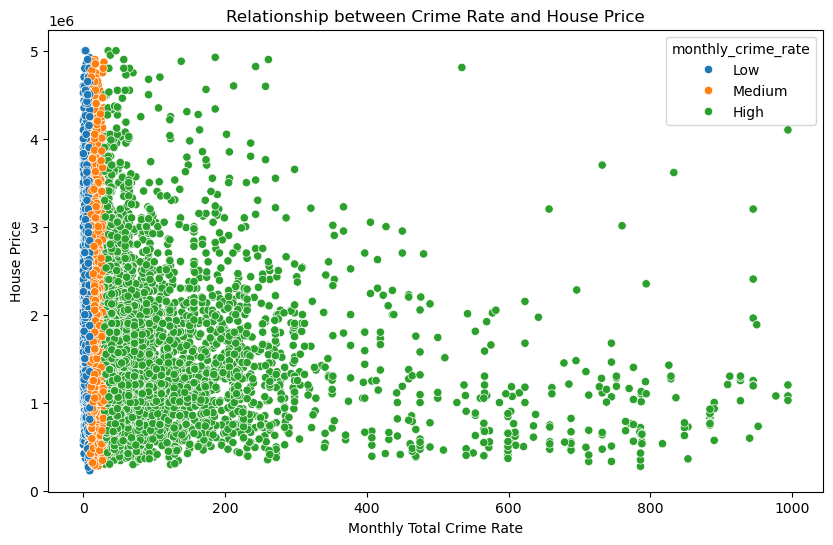

In [53]:
# Scatter plot of crime rate vs. house price, colored by crime category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly_Total', y='price', hue='monthly_crime_rate', data=final_df)
plt.title('Relationship between Crime Rate and House Price')
plt.xlabel('Monthly Total Crime Rate')
plt.ylabel('House Price')
plt.show()

The scatter plot illustrates the relationship between monthly total crime rate and house prices, with data points color-coded by crime category (Low, Medium, High). A clear pattern emerges: suburbs with low crime rates (blue and orange dots clustered on the left) tend to have higher and more varied house prices, including a concentration of properties above $2 million. In contrast, as crime rates increase (green dots extending to the right), house prices become more tightly distributed and generally lower, with few high-value outliers. This visual trend supports the hypothesis that higher crime levels are associated with reduced housing demand and lower property values, especially in areas experiencing sustained or extreme criminal activity.

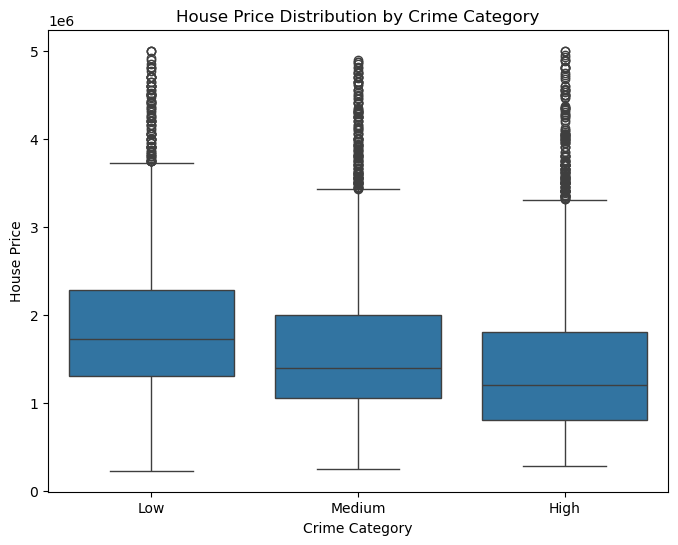

In [54]:
# Box plot of house price grouped by crime category
plt.figure(figsize=(8, 6))
sns.boxplot(x='monthly_crime_rate', y='price', data=final_df)
plt.title('House Price Distribution by Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('House Price')
plt.show()

The boxplot shows how house prices vary across suburbs grouped by crime category (Low, Medium, High), as defined by monthly crime rates. It reveals a clear downward trend in property values as crime levels increase. Suburbs in the Low crime category have the highest median house prices and a broader upper price range. In contrast, suburbs with High crime show significantly lower median prices and a tighter distribution. Although outliers exist in all categories, the overall pattern suggests that higher crime rates are associated with decreased property values, likely due to reduced desirability and perceived safety. This categorical grouping enhances interpretability and highlights the economic impact of local crime on housing markets.

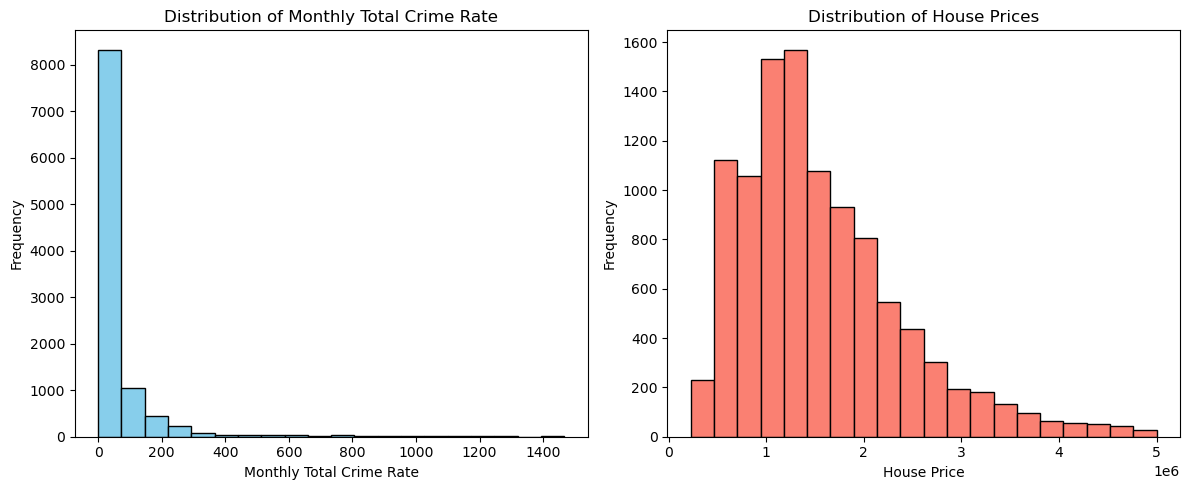

In [55]:
# Histograms for crime rate and house price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(final_df['Monthly_Total'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Total Crime Rate')
plt.xlabel('Monthly Total Crime Rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(final_df['price'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms reveal contrasting distributions for crime rates and house prices across Sydney suburbs. The monthly total crime rate is highly right-skewed, with the vast majority of suburbs experiencing fewer than 200 incidents per month — indicating that high-crime months are rare outliers. In contrast, house prices display a more symmetrical, bell-shaped distribution, centered around $1.5 million, suggesting a more balanced spread of property values with a moderate right skew. This visual comparison highlights the need to handle skewness in crime data, possibly with transformation, to ensure fair analysis in modeling.

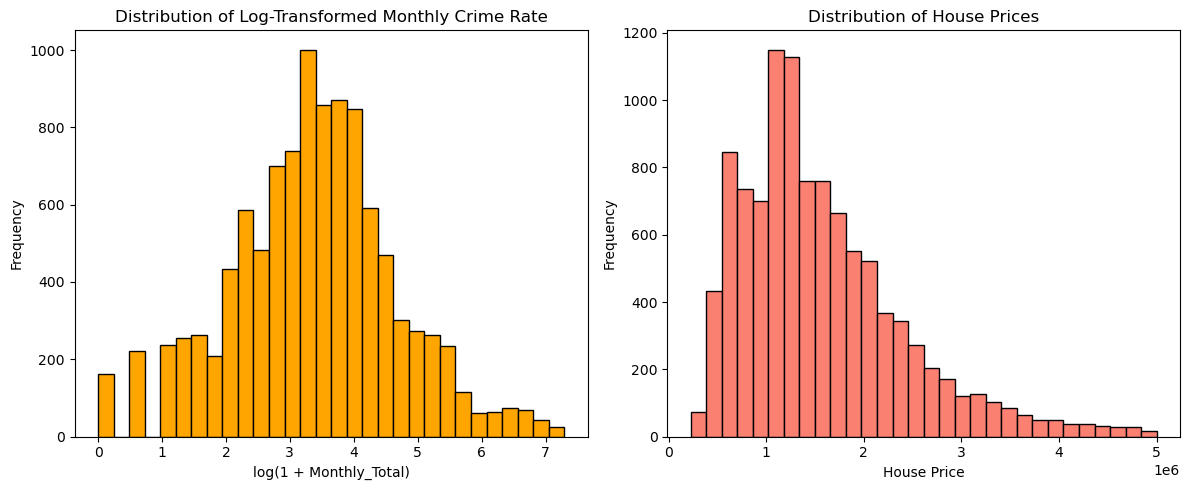

In [56]:
# Histograms: log-transformed crime rate vs house price
plt.figure(figsize=(12, 5))

# Log-Transformed Monthly Crime Rate
plt.subplot(1, 2, 1)
plt.hist(final_df['log_monthly_total'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Log-Transformed Monthly Crime Rate')
plt.xlabel('log(1 + Monthly_Total)')
plt.ylabel('Frequency')

# House Price Distribution
plt.subplot(1, 2, 2)
plt.hist(final_df['price'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms reveal that while house prices in Sydney tend to cluster around $1–2 million, crime levels—after log transformation—are more symmetrically distributed across suburbs. This suggests that moderate crime is common, while very low or very high crime levels are less frequent. Interestingly, the more normalized shape of the crime distribution after transformation allows for clearer comparisons with housing prices. Suburbs with extremely high crime may correspond to lower property values, contributing to the right-skewed nature of the house price distribution. This indicates a potential negative relationship, where higher crime levels may suppress property prices, especially at the upper end of the market.

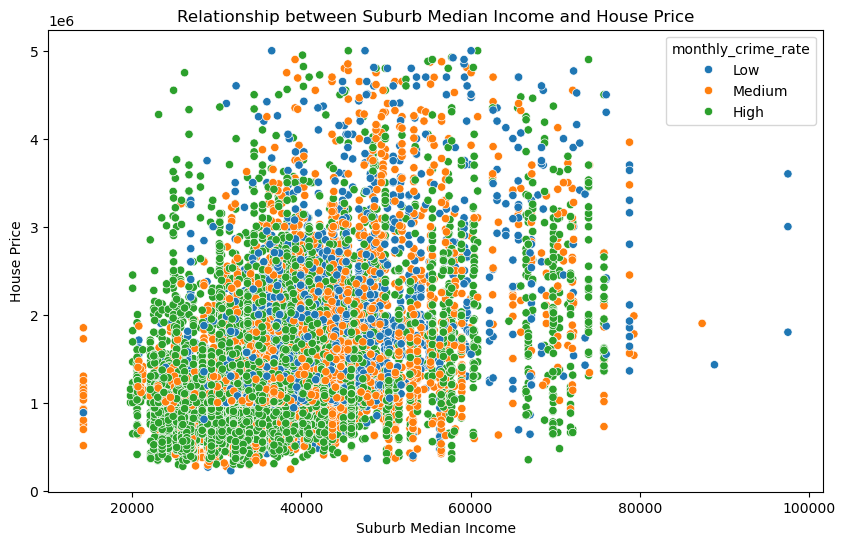

In [57]:
# Scatter plot of suburb_median_income vs. price, colored by monthly_crime_rate_category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='suburb_median_income', y='price', hue='monthly_crime_rate', data=final_df)
plt.title('Relationship between Suburb Median Income and House Price')
plt.xlabel('Suburb Median Income')
plt.ylabel('House Price')
plt.show()

The scatter plot shows a clear positive relationship between suburb median income and house prices—as income levels rise, property prices tend to increase. This trend is consistent across all crime categories, but suburbs with low crime rates (blue points) are more frequently associated with the highest house prices, especially at higher income levels. Conversely, high-crime suburbs (green points) appear more concentrated in the lower-to-mid price range, even when incomes are comparable. This suggests that crime may suppress housing prices, partially offsetting the upward influence of income. Overall, both income and crime level play important roles in shaping property values.

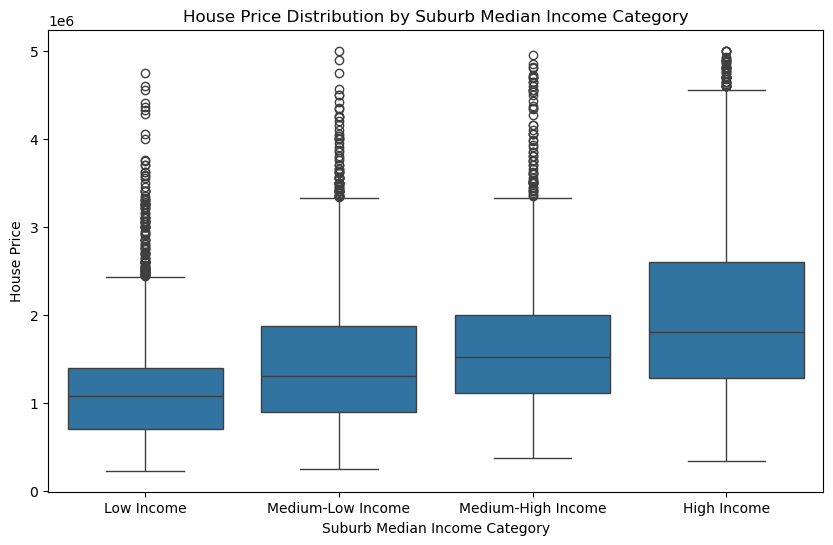

In [58]:
# Box plot of house price grouped by suburb_median_income (using bins)
final_df['income_category'] = pd.qcut(final_df['suburb_median_income'], q=4, labels=['Low Income', 'Medium-Low Income', 'Medium-High Income', 'High Income'], duplicates='drop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='income_category', y='price', data=final_df, order=['Low Income', 'Medium-Low Income', 'Medium-High Income', 'High Income'])
plt.title('House Price Distribution by Suburb Median Income Category')
plt.xlabel('Suburb Median Income Category')
plt.ylabel('House Price')
plt.show()

The boxplot highlights a strong positive relationship between suburb median income categories and house prices. As income levels increase from "Low Income" to "High Income," both the median house price and the interquartile range shift upward. High-income suburbs not only have the highest median prices but also a wider range of expensive properties. In contrast, low-income suburbs show lower and more compressed price distributions. This suggests that income is a key driver of housing affordability and market value, with wealthier areas consistently attracting higher property prices.

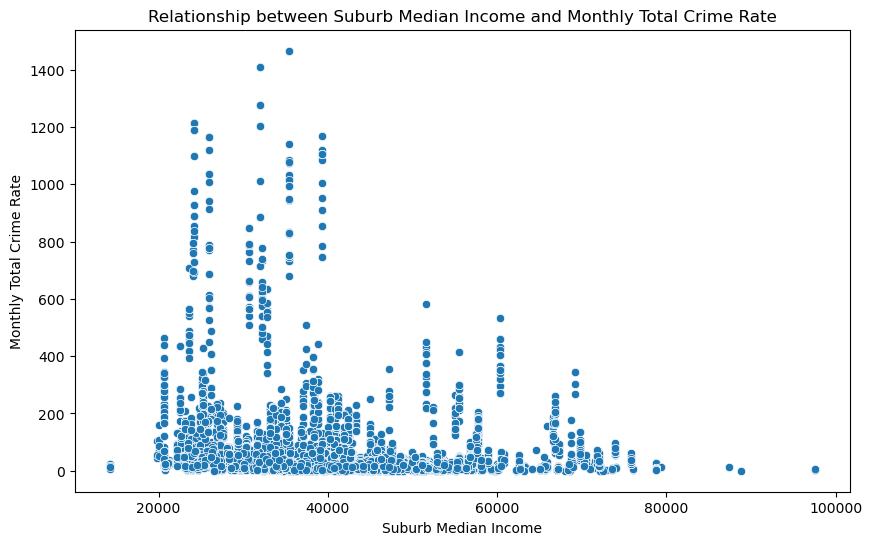

In [59]:
# Scatter plot of suburb_median_income vs. Monthly_Total crime rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='suburb_median_income', y='Monthly_Total', data=final_df)
plt.title('Relationship between Suburb Median Income and Monthly Total Crime Rate')
plt.xlabel('Suburb Median Income')
plt.ylabel('Monthly Total Crime Rate')
plt.show()

The scatter plot shows a clear negative relationship between suburb median income and monthly total crime rate. Suburbs with lower income levels tend to experience significantly higher crime rates, with several points exceeding 600 or even 1000 incidents per month. As income increases beyond $50,000, crime levels become markedly lower and more tightly clustered near zero. This trend suggests that wealthier suburbs are generally safer, possibly due to better resources, infrastructure, and social conditions. The visual pattern supports the idea that income is inversely related to crime, which has important implications for understanding urban inequality and neighborhood safety.

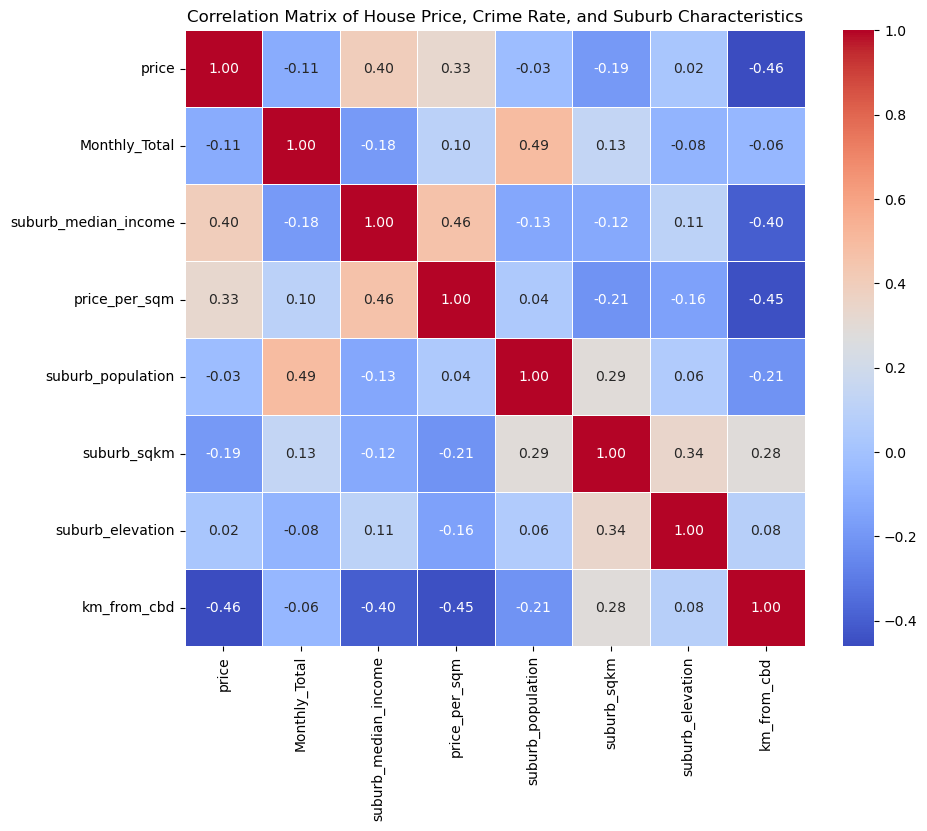

In [60]:
# Correlation matrix of relevant variables
correlation_vars = ['price', 'Monthly_Total', 'suburb_median_income', 'price_per_sqm', 'suburb_population', 'suburb_sqkm', 'suburb_elevation', 'km_from_cbd']
correlation_matrix = final_df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of House Price, Crime Rate, and Suburb Characteristics')
plt.show()

The correlation matrix provides a quantitative summary of the relationships between house prices, crime rates, and various suburb characteristics. As expected, house price shows a moderate positive correlation with suburb median income (0.40) and price per square metre (0.33), confirming that wealthier areas and higher unit prices are associated with more expensive properties. It also reveals a negative correlation between house price and crime (Monthly_Total, -0.11), suggesting that higher crime levels are weakly associated with lower property values. Additionally, distance from the CBD (km_from_cbd) has a stronger negative relationship with price (-0.46), indicating that proximity to the city center plays a major role in property valuation. Interestingly, crime (Monthly_Total) is positively correlated with suburb population (0.49), implying that more densely populated areas tend to experience higher crime rates. Overall, the matrix confirms that income, location, and crime are all meaningful contributors to house price variation.

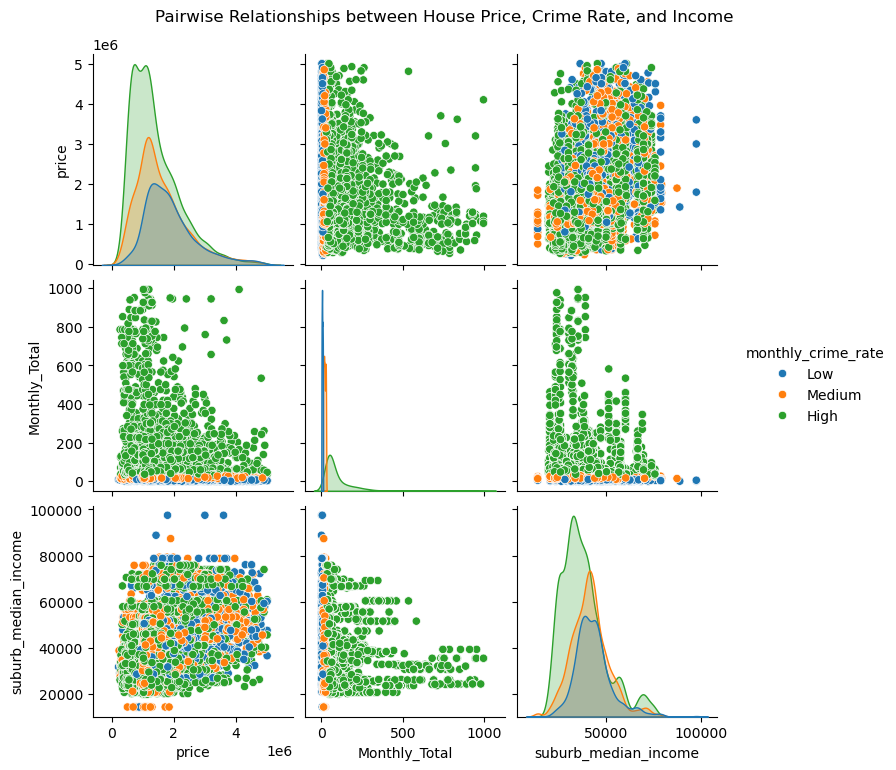

In [61]:
# Pairplot of selected variables
sns.pairplot(final_df, vars=['price', 'Monthly_Total', 'suburb_median_income'], hue='monthly_crime_rate')
plt.suptitle('Pairwise Relationships between House Price, Crime Rate, and Income', y=1.02)
plt.show()

The pairplot highlights clear patterns between house price, crime, and income. Higher house prices are generally linked to higher suburb median incomes, while areas with high crime rates tend to cluster around lower incomes and lower property values. Density plots show that low-crime suburbs are more likely to have expensive properties, whereas high-crime areas are concentrated in lower-income, lower-price segments. Overall, the plot reinforces the inverse relationship between crime and housing value, and the positive link between income and price.

## 5. Modeling and Evaluation

### 5.1 Data splitting ###

In [62]:
# Create train/test row indices
train_idx, test_idx = train_test_split(final_df.index, test_size=0.2, random_state=42)

### 5.1 . Exploring the effects of different crime types on house prices ###

**5.1.1. Basic Linear Regression**

In [63]:
# Select crime-related features
crime_features = [
    'Abduction and kidnapping', 'Against justice procedures', 'Arson',
    'Assault', 'Betting and gaming offences', 'Blackmail and extortion',
    'Coercive Control', 'Disorderly conduct', 'Drug offences', 'Homicide',
    'Intimidation, stalking and harassment', 'Liquor offences',
    'Malicious damage to property', 'Other offences',
    'Other offences against the person', 'Pornography offences',
    'Prohibited and regulated weapons offences', 'Robbery',
    'Sexual offences', 'Theft', 'Transport regulatory offences'
]

# Prepare features and targets
X_train = final_df.loc[train_idx, crime_features]
X_test = final_df.loc[test_idx, crime_features]

# Raw price
y_train_price = final_df.loc[train_idx, 'price']
y_test_price = final_df.loc[test_idx, 'price']

# Log-transformed price
y_train_log = np.log(y_train_price)
y_test_log = np.log(y_test_price)

# Train raw-price model
model_price = LinearRegression()
model_price.fit(X_train, y_train_price)
y_pred_price = model_price.predict(X_test)

# Train log-price model
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)
y_pred_log = model_log.predict(X_test)

# Back-transform log predictions
y_pred_log_back = np.exp(y_pred_log)

In [64]:
# Evaluate both models
results = {
    "Model": ["Linear Regression", "Log-Linear Regression"],
    "R² Score": [
        r2_score(y_test_price, y_pred_price),
        r2_score(y_test_price, y_pred_log_back)
    ],
    "RMSE ($)": [
        np.sqrt(mean_squared_error(y_test_price, y_pred_price)),
        np.sqrt(mean_squared_error(y_test_price, y_pred_log_back))
    ]
}

# Display results
results_df = pd.DataFrame(results)
print("Regression Performance Comparison:")
print(results_df)


Regression Performance Comparison:
                   Model  R² Score       RMSE ($)
0      Linear Regression  0.074762  810576.820069
1  Log-Linear Regression -0.099660  883683.575614


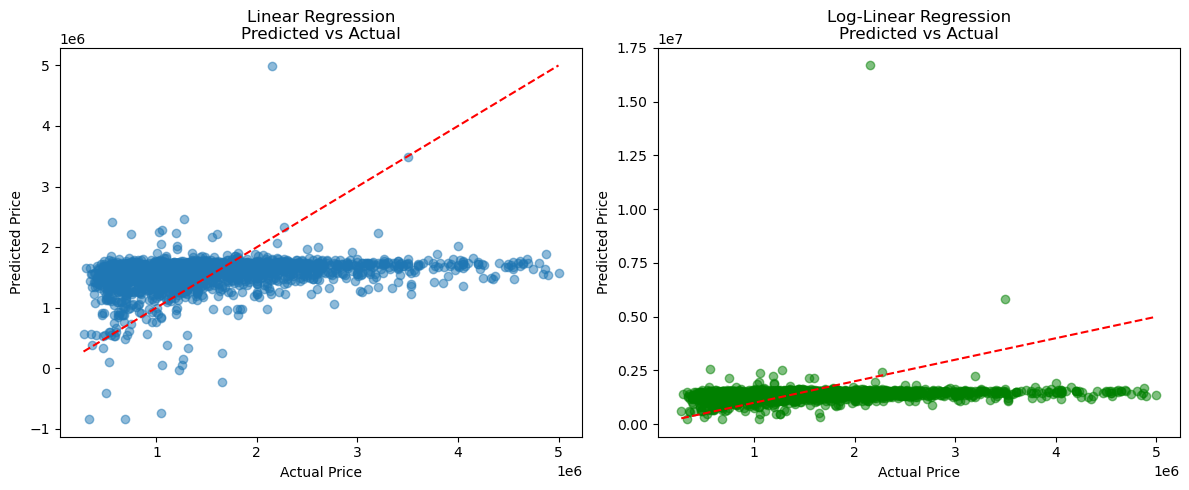

In [65]:
# Visualize predictions
plt.figure(figsize=(12, 5))

# Plot 1: Linear model
plt.subplot(1, 2, 1)
plt.scatter(y_test_price, y_pred_price, alpha=0.5)
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], 'r--')
plt.title("Linear Regression\nPredicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Plot 2: Log-linear model
plt.subplot(1, 2, 2)
plt.scatter(y_test_price, y_pred_log_back, alpha=0.5, color='green')
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], 'r--')
plt.title("Log-Linear Regression\nPredicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

The scatter plots compare predicted house prices against actual prices for both the standard Linear Regression and the Log-Linear Regression models. In the Linear Regression plot (left), predictions are tightly clustered around a flat horizontal line, indicating the model struggles to capture variations across the full price range. There are clear signs of underfitting, especially for higher-priced properties, with many outliers and a compressed prediction range.

In the Log-Linear Regression plot (right), predictions are slightly more spread out and capture low-to-mid price ranges better. However, back-transforming log predictions results in systematic underestimation of high-priced properties, and a few predictions are unrealistically high due to the exponential transformation magnifying small errors in log space. This behavior is typical when dealing with skewed data and outliers.

In [66]:
# Show results table
print("Regression Performance Comparison:")
print(results_df)

Regression Performance Comparison:
                   Model  R² Score       RMSE ($)
0      Linear Regression  0.074762  810576.820069
1  Log-Linear Regression -0.099660  883683.575614


The comparison between Linear Regression and Log-Linear Regression indicates that applying a log transformation to the target variable (price) did not improve model performance. The Linear Regression model achieved an R² score of 0.0748 with an RMSE of $810,577, while the Log-Linear model performed worse, with a negative R² of -0.0997 and a higher RMSE of $883,684. This suggests that the log transformation distorted the relationship between the predictors and the target, leading to inaccurate predictions, especially for higher-priced properties. Therefore, using the raw price is more appropriate for this dataset, and the poor results overall indicate that crime-related features alone are not strong predictors of house prices.

**5.1.2 Improving the model using Recursive Feature Elimination (RFE) for Feature Importance**

In [67]:
# Data
X = final_df[crime_features]
y = final_df['price'] 

kf = KFold(n_splits=20, shuffle=True, random_state=42)

avg_r2_scores = []
feature_counts = list(range(3, len(crime_features) + 1))  # 3 to 21

for n_features in feature_counts:
    r2_folds = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        rfe = RFE(model, n_features_to_select=n_features)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        r2_folds.append(r2_score(y_test, y_pred))

    avg_r2_scores.append(np.mean(r2_folds))
    print(f"Features: {n_features}, Mean R²: {np.mean(r2_folds):.4f}")

Features: 3, Mean R²: 0.0313
Features: 4, Mean R²: 0.0408
Features: 5, Mean R²: 0.0406
Features: 6, Mean R²: 0.0427
Features: 7, Mean R²: 0.0522
Features: 8, Mean R²: 0.0550
Features: 9, Mean R²: 0.0664
Features: 10, Mean R²: 0.0712
Features: 11, Mean R²: 0.0733
Features: 12, Mean R²: 0.0730
Features: 13, Mean R²: 0.0737
Features: 14, Mean R²: 0.0743
Features: 15, Mean R²: 0.0742
Features: 16, Mean R²: 0.0757
Features: 17, Mean R²: 0.0770
Features: 18, Mean R²: 0.0784
Features: 19, Mean R²: 0.0790
Features: 20, Mean R²: 0.0788
Features: 21, Mean R²: 0.0788


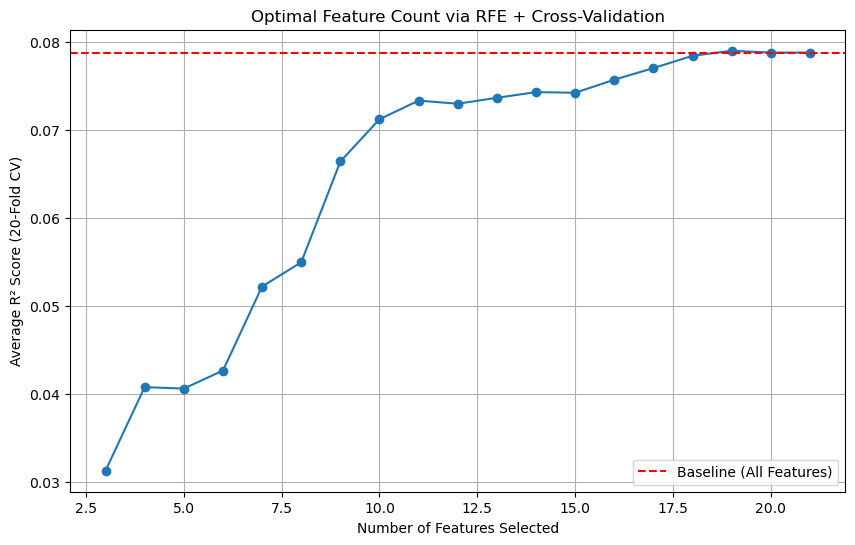

In [68]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, avg_r2_scores, marker='o')
plt.axhline(y=0.0788, color='red', linestyle='--', label='Baseline (All Features)')
plt.xlabel("Number of Features Selected")
plt.ylabel("Average R² Score (20-Fold CV)")
plt.title("Optimal Feature Count via RFE + Cross-Validation")
plt.grid(True)
plt.legend()
plt.show()

The plot illustrates how predictive performance improves as more features are included through RFE. While R² rises steadily up to around 17 features, it then plateaus. This indicates that most predictive information is captured by the top 17–18 crime-related features, and including all 21 does not significantly improve generalization. Therefore, retaining 17 features provides an optimal balance between model simplicity and performance.

In [69]:
# Reuse prepared X and y
X = final_df[crime_features]
y = final_df['price']  

# Apply RFE with 17 features
model = LinearRegression()
rfe_17 = RFE(estimator=model, n_features_to_select=17)
rfe_17.fit(X, y)

# Get selected feature names
selected_17_features = X.columns[rfe_17.support_].tolist()
print(" Top 17 features selected by RFE:")
for i, feat in enumerate(selected_17_features, 1):
    print(f"{i}. {feat}")

 Top 17 features selected by RFE:
1. Abduction and kidnapping
2. Against justice procedures
3. Arson
4. Assault
5. Betting and gaming offences
6. Blackmail and extortion
7. Disorderly conduct
8. Homicide
9. Intimidation, stalking and harassment
10. Liquor offences
11. Malicious damage to property
12. Other offences
13. Other offences against the person
14. Pornography offences
15. Robbery
16. Sexual offences
17. Theft


In [70]:
# Use selected features
X_selected_17 = X[selected_17_features]  # from RFE result
y = final_df['price'] 

# Split into train/test using your existing indices
X_train_17 = X_selected_17.loc[train_idx]
X_test_17 = X_selected_17.loc[test_idx]
y_train_17 = y.loc[train_idx]
y_test_17 = y.loc[test_idx]

# Train the model
model_17 = LinearRegression()
model_17.fit(X_train_17, y_train_17)

# Make predictions
y_pred_17 = model_17.predict(X_test_17)

# Evaluate performance
r2 = r2_score(y_test_17, y_pred_17)
mae = mean_absolute_error(y_test_17, y_pred_17)
rmse = np.sqrt(mean_squared_error(y_test_17, y_pred_17))

print("Linear Regression with Top 17 RFE Features:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Linear Regression with Top 17 RFE Features:
R² Score: 0.0754
MAE: 615105.37
RMSE: 810289.80


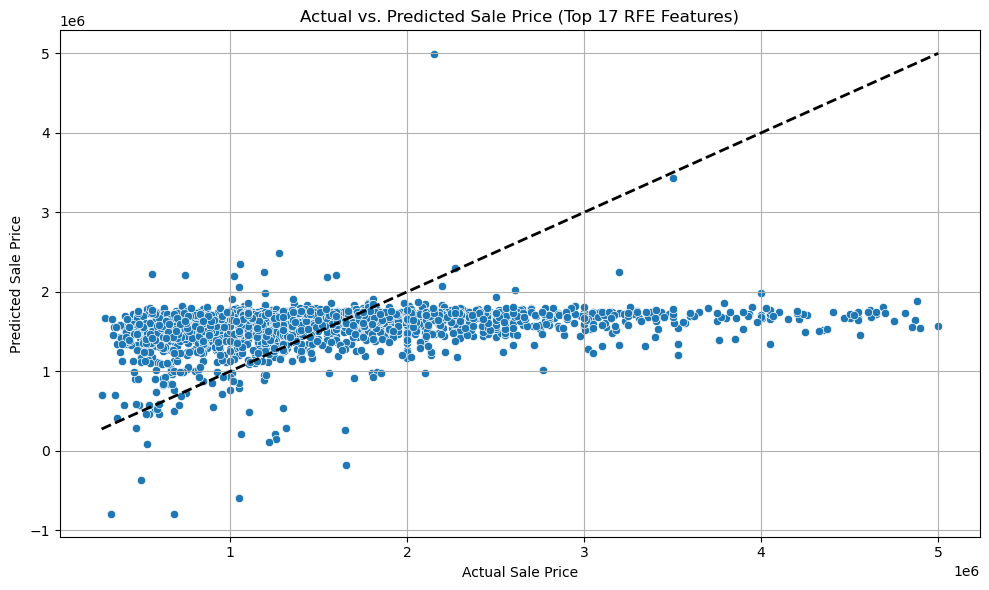

In [71]:
# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_17, y=y_pred_17)
plt.plot([y_test_17.min(), y_test_17.max()], [y_test_17.min(), y_test_17.max()], 'k--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price (Top 17 RFE Features)")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot of actual vs. predicted sale prices shows a clear pattern of poor model performance. Most predicted values cluster tightly around a narrow range, failing to reflect the full spread of actual house prices. The predicted values do not follow the ideal diagonal reference line, indicating that the model consistently underestimates high-priced properties and overestimates lower ones. This compression effect suggests that the linear regression model, even with the top 17 features selected by RFE, struggles to capture the true variation in sale prices across the dataset.

Despite reducing dimensionality with Recursive Feature Elimination (RFE), the linear regression model continued to perform poorly. This is evident from the actual vs. predicted plot, where predictions fail to align with the ideal trend. RFE helped eliminate irrelevant features, but the fundamental limitation lies in the model's assumption of a linear relationship between crime features and house prices. Housing markets are influenced by complex, non-linear patterns that linear models cannot capture effectively. As a result, even with the most informative subset of features, the model remained unable to generalize well, highlighting the need for more flexible algorithms such as K-Nearest Neighbors or decision trees.

**5.1.3 Improving the Model Performance Using KNN Parameter Tuning**

In [72]:
#  RFE-selected features
X_selected_17 = X[selected_17_features]
y = final_df['price']

X_train = X_selected_17.loc[train_idx]
X_test = X_selected_17.loc[test_idx]
y_train = y.loc[train_idx]
y_test = y.loc[test_idx]

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define formal k range (√n rule)
max_k = int(math.sqrt(len(X_train)))
k_range = list(range(1, max_k + 1))

# Grid search to find best k using 5-fold CV
param_grid = {'n_neighbors': k_range}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model and prediction
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")

Best k: 29
Test RMSE: 797070.48
Test R²: 0.1053


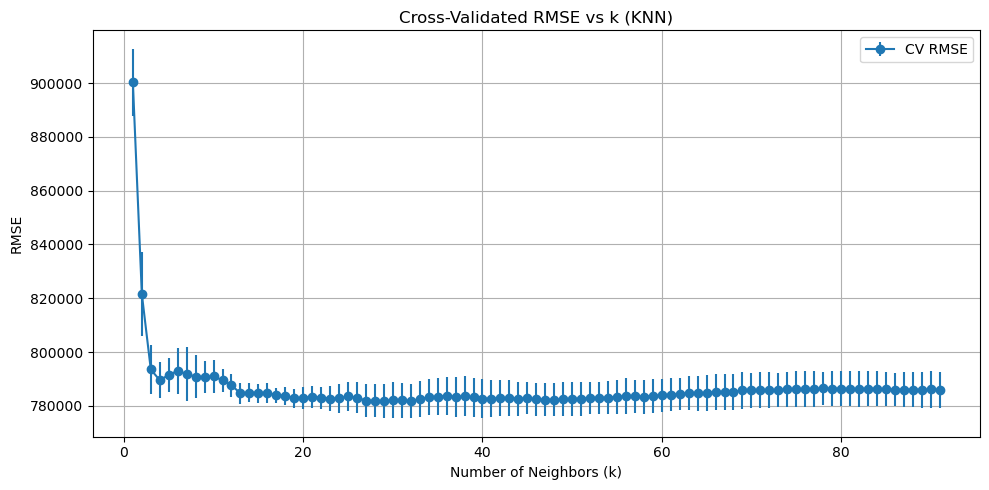

In [73]:
#Performance curve (RMSE vs k)
mean_cv_scores = -grid_search.cv_results_['mean_test_score']
std_cv_scores = grid_search.cv_results_['std_test_score']

plt.figure(figsize=(10, 5))
plt.errorbar(k_range, mean_cv_scores, yerr=std_cv_scores, fmt='o-', label='CV RMSE')
plt.title('Cross-Validated RMSE vs k (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The KNN model significantly improved over the baseline Linear Regression. After parameter tuning using cross-validated RMSE, the optimal number of neighbors was found to be k = 29. This configuration achieved a test RMSE of $797,070 and an R² score of 0.1053, suggesting a modest improvement and better handling of local price variations compared to the global assumptions of Linear Regression. The performance curve also indicates model stability in the neighborhood of the optimal k, supporting the reliability of the tuning process. However, the relatively low R² value indicates that a large portion of variance in house prices remains unexplained by the current features. While the model is methodologically sound and cross-validated, its predictive reliability is limited. To address this, Polynomial Regression was considered as a potential enhancement. This approach extends Linear Regression by incorporating interaction terms and squared features, enabling the model to capture more complex, nonlinear relationships between predictors and the target variable. Since housing prices are often influenced by nonlinear factors—such as the diminishing return of property size or the interaction between location and income—Polynomial Regression may provide a better fit to the underlying data structure and improve overall model performance.

**5.1.4 Improving the Perfomance using Polynomial Regression**

In [74]:
# Prepare features and target
X_selected_17 = X[selected_17_features]
y = final_df['price']

X_train = X_selected_17.loc[train_idx]
X_test = X_selected_17.loc[test_idx]
y_train = y.loc[train_idx]
y_test = y.loc[test_idx]

In [75]:
# Compare polynomial degrees 1 to 3 using 5-fold cross-validation
print("Comparing polynomial degrees:")
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_train_scaled)
    
    model = LinearRegression()
    r2_scores = cross_val_score(model, X_poly, y_train, scoring='r2', cv=5)
    
    print(f"Degree {degree} - Mean CV R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

Comparing polynomial degrees:
Degree 1 - Mean CV R²: 0.0804 ± 0.0094
Degree 2 - Mean CV R²: -0.2385 ± 0.4445
Degree 3 - Mean CV R²: -978.3445 ± 1623.0611


Despite testing various regression models, all achieved low R² values (below 0.11), indicating that crime-related features alone explain only a small portion of the variation in house prices. This suggests that while crime may influence property values, its effect is likely limited, indirect, or confounded by other factors not captured in the current dataset. It also highlights the complexity of housing price prediction, which may depend on a combination of economic, geographic, and property-specific variables. Future improvements could involve integrating additional contextual features or using more advanced modeling techniques such as tree-based ensembles to better capture nonlinear patterns.

**5.1.4 Discussion**


This section evaluates several regression models to address the key research question:

**"How do different types of crime quantitatively affect average residential house prices across Sydney suburbs over time?"**

The aim is to assess whether crime-related features can meaningfully predict house prices and whether advanced modeling techniques improve performance over a simple baseline.

---

### Baseline Model: Linear Regression

**Rationale:**  
Linear Regression provides a foundational benchmark due to its simplicity and interpretability. It estimates the linear relationship between predictors and the target variable (house price).

**Performance:**

| Model              | R² Score | RMSE ($)     |
|-------------------|----------|--------------|
| Linear Regression | 0.0748   | 810,577      |

**Comment:**  
The model explains just 7.5% of the variance in prices. The prediction plot shows significant underfitting, especially for high-priced properties. It fails to capture the complexity of housing price determinants.

---

### Log-Linear Regression

**Rationale:**  
Log-transforming the price target is common practice to normalize skewed distributions and stabilize variance, especially in housing price data.

**Performance:**

| Model                 | R² Score | RMSE ($)     |
|----------------------|----------|--------------|
| Log-Linear Regression| -0.0997  | 883,684      |

**Comment:**  
Performance worsened after the transformation. Back-transforming predictions distorted high-end values and amplified errors. Log transformation was not beneficial here, suggesting that the relationship between crime and price is not logarithmic.

---

### Recursive Feature Elimination (RFE)

**Rationale:**  
RFE was applied to remove noise from irrelevant crime features, retaining the most informative variables to enhance model clarity and reduce overfitting.

**Outcome:**  
Even with the top 17 crime features, the linear model’s performance remained nearly unchanged (R² ≈ 0.075), indicating that the core limitation lies in the model’s assumptions, not feature selection alone.

---

### K-Nearest Neighbors (KNN)

**Rationale:**  
KNN is a non-parametric model that uses similarity between observations to make predictions. It’s well-suited to capturing local patterns and nonlinear interactions that linear models miss.

**Performance (best k = 29):**

| Model | R² Score | RMSE ($)     |
|-------|----------|--------------|
| KNN   | 0.1053   | 797,070      |

**Comment:**  
KNN showed modest improvement over linear models by capturing local price trends. However, with R² still low (~10.5%), it indicates limited explanatory power in the crime features. The performance was more stable and reliable after tuning.

---

### Polynomial Regression

**Rationale:**  
Polynomial Regression adds interaction and squared terms to capture non-linear trends in data. Given the complex, non-linear nature of property pricing, this model was tested as a potential enhancement.

**Cross-Validation Results:**

| Degree | Mean CV R² | Notes                            |
|--------|------------|----------------------------------|
| 1      | 0.0804     | Similar to baseline              |
| 2      | -0.2385    | Overfitting and instability      |
| 3      | -978.3445  | Severe overfitting and breakdown |

**Comment:**  
Increasing the polynomial degree led to severe overfitting, especially at degree 3. This highlights the danger of complexity without regularization, especially with noisy data.

---

### Summary & Conclusion

| Model                 | R² Score | RMSE ($)     | Comment                                      |
|-----------------------|----------|--------------|----------------------------------------------|
| Linear Regression     | 0.0748   | 810,577      | Simple, interpretable but underfits badly    |
| Log-Linear Regression | -0.0997  | 883,684      | Transformation worsened model performance    |
| RFE + Linear Regression| 0.0754  | 810,290      | Feature pruning didn’t improve accuracy      |
| KNN (k=29)            | 0.1053   | 797,070      | Best performance; captures local variation   |
| Polynomial Regression | —        | —            | Overfit at higher degrees; not suitable here |

The analysis reveals that there is a weak and inconsistent relationship between individual crime types and residential house prices across Sydney suburbs. Despite applying various regression techniques—including baseline Linear Regression, feature selection via RFE, K-Nearest Neighbors, and Polynomial Regression—model performance remained low, with R² values consistently under 0.11. This indicates that specific crime categories alone are not strong predictors of housing prices. However, the overall level of crime* as represented by aggregate measures like the total monthly or yearly crime count, may still have some influence on property values. Therefore, crime in isolation—especially broken down by category—offers limited explanatory power for housing price prediction.

### 5.2. Can suburbs be clustered into meaningful groups based on crime rate, total crime count, and household income—and do these clusters show distinct house price patterns? ###

### Clustering ###

In [76]:
# Rename relevant columns to standard names used in clustering
cluster_df = final_df.rename(columns={
    'monthly_crime': 'Monthly_Total',
    'yearly_crime': 'Yearly_Total',
    'income': 'suburb_median_income',
    'price_log': 'log_price'
})

# Select features for clustering
features_to_cluster = ['Monthly_Total', 'Yearly_Total', 'suburb_median_income']

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df[features_to_cluster])

**5.2.1 K-Means Clustering**

In [77]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
cluster_df['kmeans_cluster'] = kmeans_labels

# Evaluate
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {kmeans_ch_score:.2f}")

Silhouette Score: 0.4489
Calinski-Harabasz Score: 10914.38


The clustering results indicate that the model produced well-defined and meaningful groups of suburbs. A Silhouette Score of 0.4489 suggests that the clusters have a good balance between internal cohesion and separation from other clusters—data points within the same cluster are relatively similar, while being distinct from those in other clusters. Additionally, the Calinski-Harabasz Score of 10914.38 reinforces this conclusion, as it reflects a high ratio of between-cluster variance to within-cluster variance. This implies that the clusters are both compact and well-separated. Overall, these evaluation metrics indicate that the KMeans clustering with four clusters is a suitable and effective approach for grouping suburbs based on crime rates and household income, providing a solid foundation for further analysis of house price patterns within each group.

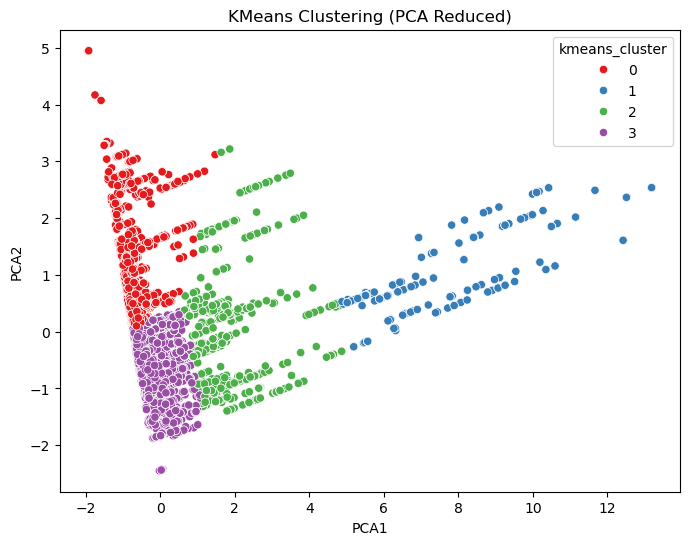

In [78]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_df['PCA1'] = X_pca[:, 0]
cluster_df['PCA2'] = X_pca[:, 1]

# Plot KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='kmeans_cluster', palette='Set1')
plt.title('KMeans Clustering (PCA Reduced)')
plt.show()

The PCA scatterplot visualizes the four KMeans clusters in two dimensions, reduced from the original three-feature space of monthly crime, yearly crime, and household income. PCA allow to inspect whether the clusters discovered in the full space remain visually separable in a lower-dimensional projection. Each cluster is colored distinctly, showing how suburbs group based on similar crime-income profiles. Cluster 1 appears more dispersed, possibly reflecting diverse combinations of income and crime, while Cluster 0 is more compact—indicating consistent low-crime, high-income characteristics. The separation between clusters suggests that the relationship between socioeconomic conditions and crime patterns is strong enough to yield stable groups of suburbs, which, as shown earlier, also correlate with significantly different housing prices.

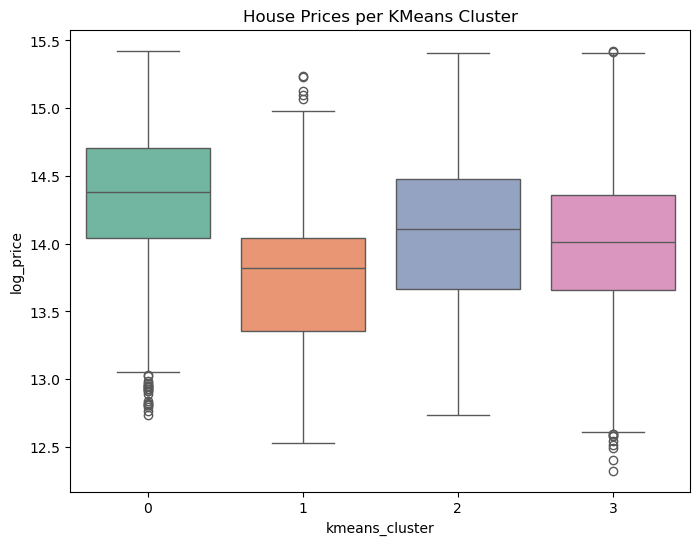

In [79]:
# Price distribution by KMeans cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=cluster_df, x='kmeans_cluster', y='log_price', hue='kmeans_cluster', palette='Set2', legend=False)
plt.title("House Prices per KMeans Cluster")
plt.show()

This boxplot illustrates the distribution of log-transformed house prices across the four clusters derived using KMeans. Log transformation was applied to house prices to reduce skewness, stabilize variance, and improve the effectiveness and interpretability of KMeans clustering.Clusters were formed based on suburbs' monthly and yearly crime levels along with median household income. Clear differences in the median log-prices suggest that clustering on these crime and socioeconomic indicators reveals meaningful segmentation in the property market. For example, Cluster 0 demonstrates the highest median house prices, which may reflect areas with lower crime and higher income. Cluster 1, with the lowest median price and a tighter spread, likely represents high-crime, lower-income suburbs. The consistent outliers in each cluster indicate that within each crime-income group, some suburbs deviate significantly in price—possibly due to additional factors like location or infrastructure. Overall, this visualization confirms that the clusters are not only statistically valid but also practically relevant in understanding property value variation.

**5.2.2  Density-Based Spatial Clustering of Applications with Noise**

In [80]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
cluster_df['dbscan_cluster'] = dbscan_labels

# Evaluate (excluding outliers)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    dbscan_ch_score = calinski_harabasz_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = None
    dbscan_ch_score = None

# Display DBSCAN Evaluation Metrics
print("DBSCAN Evaluation Metrics (excluding outliers):")
if dbscan_silhouette is not None and dbscan_ch_score is not None:
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"Calinski-Harabasz Score: {dbscan_ch_score:.2f}")
else:
    print("Clustering not valid: Only one cluster or no valid points found.")

DBSCAN Evaluation Metrics (excluding outliers):
Silhouette Score: 0.8328
Calinski-Harabasz Score: 376.99


The DBSCAN clustering yielded highly effective results, as demonstrated by the evaluation metrics computed after excluding outliers. A Silhouette Score of 0.8328 indicates excellent cohesion within clusters and strong separation between them, suggesting that the algorithm identified well-defined and naturally occurring groupings of suburbs based on monthly crime, yearly crime, and household income. Additionally, the Calinski-Harabasz Score of 376.99 confirms the compactness and distinctness of these clusters, highlighting DBSCAN’s strength in discovering meaningful density-based patterns.

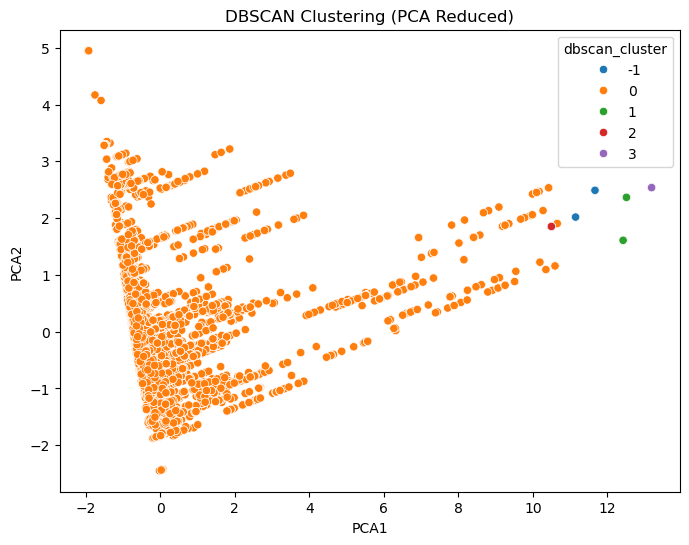

In [81]:
# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.show()

This PCA scatterplot shows the DBSCAN clustering results, where most suburbs fall into a single dense cluster (orange), indicating similar crime and income profiles. A few small clusters and outliers are scattered on the edges, showing suburbs with distinct or unusual patterns. The plot reflects DBSCAN’s ability to group dense regions while flagging anomalies effectively.

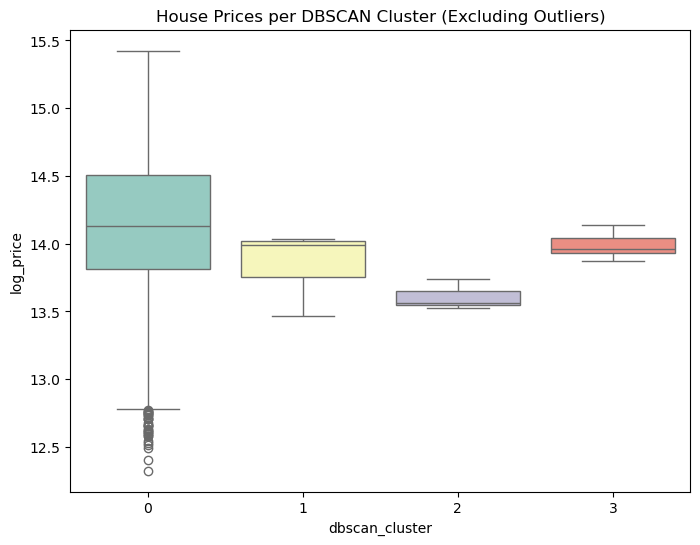

In [82]:
# Price distribution by DBSCAN cluster (excluding outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=cluster_df[cluster_df['dbscan_cluster'] != -1],
    x='dbscan_cluster',
    y='log_price',
    hue='dbscan_cluster',
    palette='Set3',
    legend=False
)
plt.title("House Prices per DBSCAN Cluster (Excluding Outliers)")
plt.show()


This boxplot compares log-transformed house prices across DBSCAN clusters, formed using monthly crime, yearly crime, and household income. Cluster 0 displays the widest price range and highest median, likely representing suburbs with high income and lower crime levels. In contrast, Clusters 2 and 3 have narrower ranges and lower median prices, suggesting more uniform and possibly lower-income or higher-crime areas. The distinct separation in median prices between clusters confirms that DBSCAN has effectively identified meaningful socioeconomic groupings that also correspond to differences in property values.

**5.2.3 Cluster Analysis Discussion: KMeans & DBSCAN**

To address the relationship between crime and house prices in Sydney suburbs, clustering analysis was performed to investigate whether suburbs could be meaningfully segmented based on aggregate crime metrics and household income—and if these clusters reveal distinct housing price patterns.

**Rationale for Model Choice:**  
Clustering allows exploration of natural groupings in the data without presupposing linear relationships. Given the complexity and non-linearity of socioeconomic and crime dynamics, two complementary clustering methods were selected:

- **KMeans**, a centroid-based algorithm, efficiently partitions data into spherical clusters, optimizing for intra-cluster similarity and inter-cluster separation. It provides interpretable, balanced groupings, suitable for broad urban segmentation.
  
- **DBSCAN**, a density-based method, identifies arbitrarily shaped clusters based on local density and detects outliers explicitly. It excels in discovering dense neighborhood structures and isolating atypical suburbs that deviate from general trends.

---

### Results and Performance Comparison

| Metric                    | KMeans   | DBSCAN  |
|---------------------------|----------|---------|
| Silhouette Score          | 0.4489   | 0.8328  |
| Calinski-Harabasz Score   | 10914.38 | 376.99  |
| Number of Clusters        | 4        | 4       |

- **KMeans** produced four well-balanced clusters, as reflected in a moderately high Silhouette Score (0.4489) indicating decent cluster cohesion and separation. The exceptionally high Calinski-Harabasz score (10914.38) confirms that clusters are compact and well-separated on a global scale.

- **DBSCAN**, while yielding the same number of clusters, attained a much higher Silhouette Score (0.8328), indicating very tight, well-defined local clusters. However, its Calinski-Harabasz score was lower (376.99), reflecting potentially less distinct global separation due to its sensitivity to cluster density and shape irregularities. DBSCAN also identified three suburbs as outliers—highlighting its capacity to detect anomalies that KMeans cannot.

---

### Advantages and Disadvantages of Each Method

| Model    | Advantages                                                                                                     | Disadvantages                                                                                              |
|----------|----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **KMeans** | - Efficiently handles large datasets (11,000+ property records) with fast computation.                      | - Assumes clusters are spherical and similar-sized, which may oversimplify Sydney suburbs’ diverse spatial and socio-economic patterns. |
|          | - Produces balanced, interpretable clusters that align well with known factors like suburb median income and aggregate crime counts. | - Sensitive to outliers (e.g., extreme house prices or crime spikes in some suburbs) that can distort cluster centroids.                   |
|          | - Optimizes global cluster centroids, providing stable partitions across key features like median income, crime totals, and population. | - Requires pre-specifying number of clusters (k=4 in this analysis), which may not reflect true natural groupings in a complex urban area.  |
| **DBSCAN** | - Detects clusters of arbitrary shape, ideal for capturing irregular and dense clusters in suburbs with heterogeneous population and crime patterns. | - Sensitive to parameters (eps, min_samples) |
|          | - Explicitly identifies outliers — useful for flagging suburbs with unusual crime-income profiles or anomalous housing prices. | - May fragment clusters if data density varies widely, common in Sydney’s mix of urban, suburban, and semi-rural zones.                      |
|          | - Does not require specifying the number of clusters, allowing adaptation to the underlying data structure and spatial heterogeneity. | - Computationally heavier and less scalable for very large or multi-year temporal datasets such as this dataset spanning 2016–2021.          |

---

### Conclusion

In conclusion, suburbs can indeed be meaningfully clustered based on crime rates and household income, with both KMeans and DBSCAN revealing distinct house price patterns across groups. KMeans provided broader, interpretable clusters reflecting overall socio-economic stratification, while DBSCAN effectively isolated dense, homogeneous areas—particularly high-income, low-crime suburbs with higher property values. These findings highlight that crime and income factors play a significant role in shaping property price distributions across Sydney.

### 5.3 To what extent can house prices be predicted using crime intensity (e.g., monthly crime rate), income levels, and property features—and which factors contribute most according to tree-based models? ###

**5.3.1 Decission Tree**

In [83]:
# Use full set of features for predicting log house price
features = [
    'Monthly_Total',
    'Yearly_Total',
    'suburb_median_income',
    'num_bed',
    'num_bath',
    'num_parking',
    'property_size',
    'km_from_cbd'
]

# Define X and y for the regression model
X = cluster_df[features]
y_log = cluster_df['log_price']     

# Split data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Try different depths
depths = [2, 4, 6, 8, 10]

# Store results
results = []

for d in depths:
    # Create and train the model
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train_log)
    
    # Predict
    y_pred = tree.predict(X_test)
    
    # Evaluate
    r2 = r2_score(y_test_log, y_pred)
    mse = mean_squared_error(y_test_log, y_pred)
    rmse = np.sqrt(mse)  # Manual square root
    mae = mean_absolute_error(y_test_log, y_pred)
    
    # Save results
    results.append((d, r2, rmse, mae))

# Print results
print("Depth | R² Score | RMSE | MAE")
for d, r2, rmse, mae in results:
    print(f"{d:<5} | {r2:.4f}   | {rmse:.4f} | {mae:.4f}")

Depth | R² Score | RMSE | MAE
2     | 0.3717   | 0.4192 | 0.3303
4     | 0.5346   | 0.3608 | 0.2836
6     | 0.6069   | 0.3316 | 0.2575
8     | 0.6504   | 0.3127 | 0.2403
10    | 0.6556   | 0.3104 | 0.2356


In [84]:
# Train decision tree using the best depth found above
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train_log)

# Predict on the test set
y_pred_log = tree_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test_log, y_pred_log)                        # R-squared
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))  # RMSE
mae = mean_absolute_error(y_test_log, y_pred_log)            # MAE

# Print results
print(" Final Decision Tree Model Evaluation")
print(f"R² Score: {r2:.4f}")
print(f"RMSE (log price): {rmse:.4f}")
print(f"MAE (log price): {mae:.4f}")


 Final Decision Tree Model Evaluation
R² Score: 0.6556
RMSE (log price): 0.3104
MAE (log price): 0.2356


In [85]:
# Convert predicted and actual log prices back to raw prices
y_pred_price = np.exp(y_pred_log)
y_test_price = np.exp(y_test_log)

# Calculate error in actual price
mae_price = mean_absolute_error(y_test_price, y_pred_price)
rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))

print("Evaluation in Actual Price ($)")
print(f"MAE: ${mae_price:,.2f}")
print(f"RMSE: ${rmse_price:,.2f}")

Evaluation in Actual Price ($)
MAE: $377,133.35
RMSE: $559,369.91


A Decision Tree Regressor was trained to predict log-transformed house prices using a combination of crime intensity, household income, and property features. The final model, using a depth of 10, achieved an R² score of 0.6556, indicating that approximately 66% of the variation in house prices was explained by the model. The root mean squared error (RMSE) was 0.3104, and the mean absolute error (MAE) was 0.2356 in log price units. These results suggest that while the model captured important patterns in the data, some unexplained variability remains, likely due to unmeasured factors such as location-specific desirability, building condition, or nearby amenities.

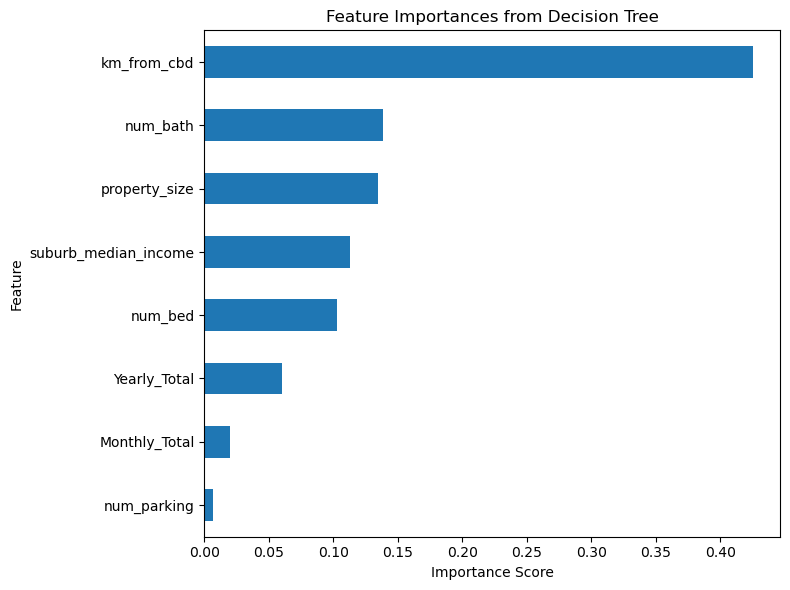

In [86]:
# Get feature importances from the trained decision tree
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(8, 6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In response to the question of how well house prices can be predicted using crime intensity, income levels, and property features, the Decision Tree Regressor revealed that property prices are influenced most strongly by location and structural characteristics. The most important predictor was the distance from the Sydney CBD (km_from_cbd), indicating that proximity to central urban areas plays a major role in determining price. Other significant contributors included the number of bathrooms, property size, and the median household income of the suburb, highlighting the relevance of both physical and socioeconomic features. Crime-related variables—specifically Yearly_Total and Monthly_Total—were found to have relatively low predictive importance in the model. This suggests that while crime intensity does contribute to house price variation, it is less influential than location and core property attributes. Overall, tree-based analysis shows that house prices can be reasonably predicted using these features, with property and location factors contributing most.

In [87]:
# Define parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,                               # 5-fold CV
    scoring='neg_mean_squared_error',  # Minimize MSE
    n_jobs=-1                          # Use all CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train_log)

# Get the best model
best_tree = grid_search.best_estimator_

# Show best parameters found
print(" Best Parameters from GridSearch:")
print(grid_search.best_params_)

 Best Parameters from GridSearch:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [88]:
# Predict on the test set
y_pred_best = best_tree.predict(X_test)

# Evaluate performance
r2_best = r2_score(y_test_log, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_log, y_pred_best))
mae_best = mean_absolute_error(y_test_log, y_pred_best)

print(" Tuned Decision Tree Evaluation")
print(f"R² Score: {r2_best:.4f}")
print(f"RMSE (log price): {rmse_best:.4f}")
print(f"MAE (log price): {mae_best:.4f}")

 Tuned Decision Tree Evaluation
R² Score: 0.6553
RMSE (log price): 0.3105
MAE (log price): 0.2363


GridSearchCV was applied to optimize the Decision Tree Regressor by tuning key hyperparameters: max_depth, min_samples_split, and min_samples_leaf. The best parameters identified were max_depth=10, min_samples_split=2, and min_samples_leaf=4. However, the performance of the tuned model was nearly identical to the untuned model. The tuned model achieved an R² of 0.6553, RMSE of 0.3105, and MAE of 0.2363, compared to the untuned model’s R² of 0.6556, RMSE of 0.3104, and MAE of 0.2356. These results suggest that the initial manually chosen configuration was already near-optimal for this dataset, and that further tuning provided minimal improvement.

**5.3.2 Random Forest**

In [89]:
# Initialize Random Forest with basic settings
rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=10,        
    random_state=42,
    n_jobs=-1             
)

# Train the model on training data
rf_model.fit(X_train, y_train_log)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
r2_rf = r2_score(y_test_log, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_log, y_pred_rf))
mae_rf = mean_absolute_error(y_test_log, y_pred_rf)

print("Random Forest Evaluation")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE (log price): {rmse_rf:.4f}")
print(f"MAE (log price): {mae_rf:.4f}")

Random Forest Evaluation
R² Score: 0.7285
RMSE (log price): 0.2756
MAE (log price): 0.2096


In [90]:
# Convert predictions from log scale back to real prices
y_pred_rf_price = np.exp(y_pred_rf)
y_test_rf_price = np.exp(y_test_log)

# Real-world error
mae_price_rf = mean_absolute_error(y_test_rf_price, y_pred_rf_price)
rmse_price_rf = np.sqrt(mean_squared_error(y_test_rf_price, y_pred_rf_price))

print("Real Price Scale Evaluation")
print(f"MAE: ${mae_price_rf:,.2f}")
print(f"RMSE: ${rmse_price_rf:,.2f}")

Real Price Scale Evaluation
MAE: $335,265.84
RMSE: $503,390.83


<Figure size 1000x500 with 0 Axes>

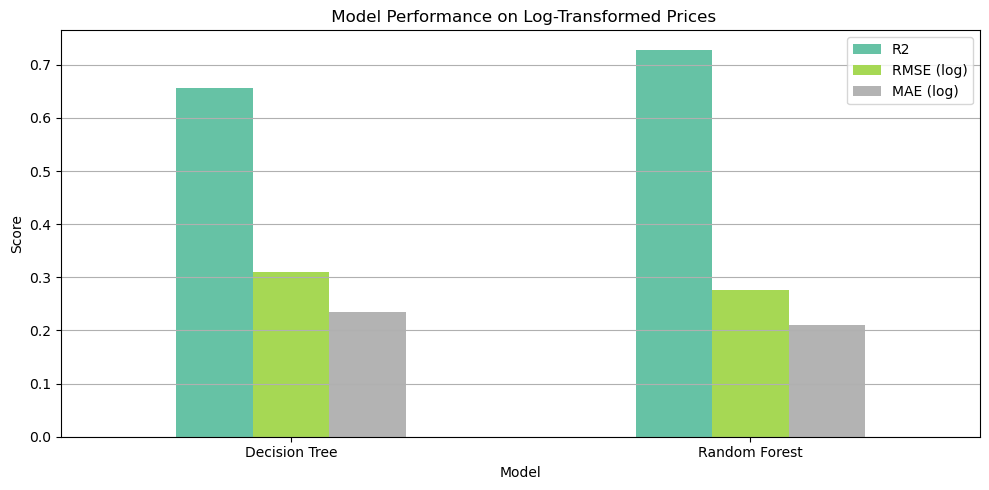

In [91]:
# Log price metrics
metrics_log = {
    'Model': ['Decision Tree', 'Random Forest'],
    'R2': [0.6556, r2_rf],
    'RMSE (log)': [0.3104, rmse_rf],
    'MAE (log)': [0.2356, mae_rf]
}

# Real price metrics
metrics_real = {
    'Model': ['Decision Tree', 'Random Forest'],
    'RMSE ($)': [559369.91, rmse_price_rf],
    'MAE ($)': [377133.35, mae_price_rf]
}

# Create DataFrame for log scale
df_log = pd.DataFrame(metrics_log)

# Plot
plt.figure(figsize=(10, 5))
df_log.set_index('Model')[['R2', 'RMSE (log)', 'MAE (log)']].plot(
    kind='bar', figsize=(10, 5), colormap='Set2'
)
plt.title(" Model Performance on Log-Transformed Prices")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

 Random Forest outperformed the Decision Tree across all three metrics. It achieved a higher R² score, indicating that it explains more variance in housing prices. Both the root mean squared error (RMSE) and mean absolute error (MAE) were lower for Random Forest, confirming that it makes more accurate and consistent predictions on the normalized (log) scale. These results highlight the strength of ensemble methods in capturing complex relationships within the data and reducing prediction errors.

<Figure size 1000x500 with 0 Axes>

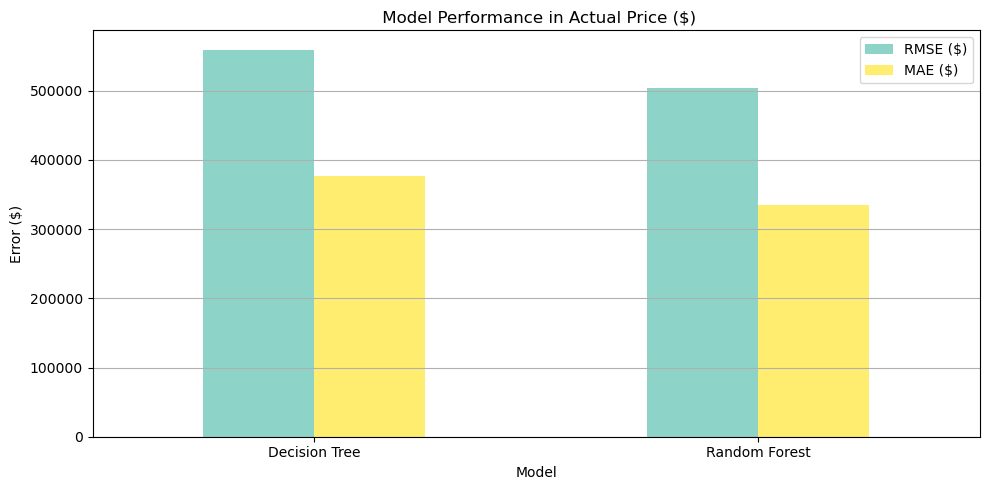

In [92]:
# Create DataFrame for real-world dollar scale
df_real = pd.DataFrame(metrics_real)

# Plot
plt.figure(figsize=(10, 5))
df_real.set_index('Model')[['RMSE ($)', 'MAE ($)']].plot(
    kind='bar', figsize=(10, 5), colormap='Set3'
)
plt.title(" Model Performance in Actual Price ($)")
plt.ylabel("Error ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Random Forest again showed superior performance, with a mean absolute error (MAE) of approximately $335,266, compared to $377,133 for the Decision Tree. Similarly, the root mean squared error (RMSE) was reduced from $559,370 to $503,391. These reductions represent meaningful improvements in practical terms, as they reflect lower average and worst-case prediction errors in actual housing prices. The results demonstrate that Random Forest not only improves statistical accuracy but also delivers more reliable estimates in real-world monetary values.

**Comparison of Decession Tree and Random Forest** 

The Decision Tree Regressor offers strong interpretability, presenting a clear, human-readable structure that shows how feature splits influence predictions. This makes it particularly useful for understanding the role of individual variables such as `km_from_cbd` or `monthly_crime_rate`. It is also fast to train and requires minimal preprocessing, making it suitable for rapid prototyping, and it can naturally capture non-linear relationships without needing transformations. However, Decision Trees are prone to overfitting, especially when deep, which reduces their generalizability to new data. They are also sensitive to small changes in the dataset, which can result in entirely different trees, and in this project, they showed relatively weaker performance (MAE: $377,133; RMSE: $559,370). In contrast, the Random Forest Regressor delivered significantly better accuracy (MAE: $335,266; RMSE: $503,391) by averaging multiple trees, which enhances robustness and reduces overfitting. It also provided stable feature importance rankings, with `km_from_cbd`, `property_size`, and `suburb_median_income` emerging as the top predictors. Despite its superior performance, Random Forest is less interpretable due to its ensemble nature, making it harder to trace individual decision paths. It also requires more computational resources and careful control of randomness to ensure reproducibility. Overall, Random Forest proved to be the more effective model in this context, offering better generalization and predictive reliability, while Decision Tree remains a valuable tool for transparency and initial exploration.

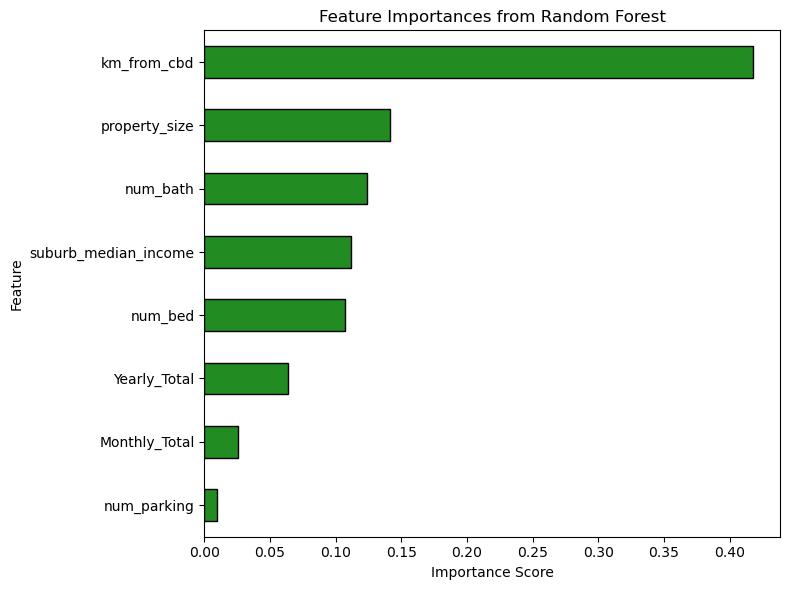

In [93]:
# Get feature importances from trained model
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(8, 6))
rf_importances.sort_values().plot(kind='barh', color='forestgreen', edgecolor='black')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The Random Forest Regressor highlighted km_from_cbd (distance from Sydney CBD) as the most influential predictor of house prices by a large margin. This reinforces the strong role of location in Sydney’s property market, where proximity to the city center significantly increases home values. Key property attributes such as property_size, num_bath, and num_bed followed in importance, confirming that physical house characteristics are essential factors in pricing. Socioeconomic context, represented by suburb_median_income, also contributed meaningfully. In contrast, crime-related variables such as Monthly_Total and Yearly_Total had relatively low importance, suggesting that while crime may have some influence, it is secondary to location and property quality. Overall, the Random Forest model aligns with the Decision Tree in feature ranking but offers more robust and stable importance estimates due to its ensemble nature.

### 5.4 How does the categorical monthly crime rate (Low, Medium, High) impact the distribution of house prices across Sydney suburbs, and can we predict price effectively using only categorical variables like crime rate, property type, and suburb? ###

**5.4.1 Use random forest to predict the price based on categorical monthly crime rite**

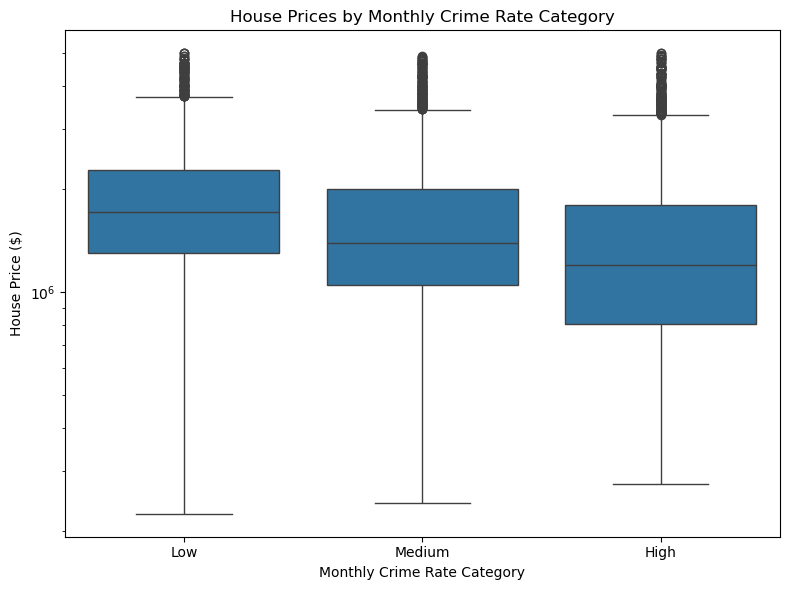

In [94]:
# Plot House Prices by Monthly Crime Rate Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_df, x='monthly_crime_rate', y='price')  #
plt.title("House Prices by Monthly Crime Rate Category")
plt.xlabel("Monthly Crime Rate Category")
plt.ylabel("House Price ($)")
plt.yscale('log') 
plt.tight_layout()
plt.show()

The boxplot shows that as monthly crime rate increases, median house prices tend to decrease. Low-crime areas have higher and more variable prices, while high-crime areas show lower and more consistent prices. This supports including crime intensity as an important feature in predictive models.

In [95]:
# Numeric target
y = final_df['log_price']  

# Categorical predictors
categorical_features = ['monthly_crime_rate', 'type', 'suburb']

# One-hot encode categorical features
X_cat = final_df[categorical_features]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_cat)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
print("Random Forest Regression R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest Regression R²: 0.18700554297551386
Random Forest RMSE: 0.47687540500240455
Random Forest MAE: 0.38409000026279755


In [96]:
y_pred_rf_price = np.exp(y_pred_rf)
y_test_price = np.exp(y_test)

print("Random Forest Regression MAE ($):", mean_absolute_error(y_test_price, y_pred_rf_price))
print("Random Forest Regression RMSE ($):", np.sqrt(mean_squared_error(y_test_price, y_pred_rf_price)))


Random Forest Regression MAE ($): 572260.7832050364
Random Forest Regression RMSE ($): 801568.7146412975


The low R² suggests that categorical variables alone are insufficient for precise numeric price prediction. This makes sense because numeric property features (like size, bedrooms, bathrooms) and continuous variables (like income or distance to CBD) usually explain much more price variability. The large dollar-scale errors indicate that the model’s numeric predictions are quite approximate and may be useful only for broad price range estimation rather than exact valuation.

**5.4.2 Use categorical crime rate data to predict categorical house price**

In [97]:
# Create price categories (Low, Medium, High) based on tertiles of price
final_df['price_category'] = pd.qcut(final_df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Select categorical features to use as predictors
categorical_features = ['monthly_crime_rate', 'type', 'suburb']

# Extract predictor variables and target variable
X_cat = final_df[categorical_features]
y_cat = final_df['price_category']

# One-hot encode the categorical predictor variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_cat)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_cat, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict price categories on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate model accuracy and display classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.4933014354066986
              precision    recall  f1-score   support

        High       0.43      0.88      0.58       668
         Low       0.66      0.54      0.60       712
      Medium       0.43      0.08      0.13       710

    accuracy                           0.49      2090
   macro avg       0.51      0.50      0.44      2090
weighted avg       0.51      0.49      0.43      2090



The Random Forest classifier achieved an overall accuracy of approximately 48%, indicating that it correctly predicts the house price category (Low, Medium, or High) nearly half of the time, which is better than random chance but leaves considerable room for improvement. The model performs reasonably well in identifying Low and High price categories, with recall values around 70%, meaning most houses in these groups are correctly classified. However, it struggles significantly with the Medium category, showing a very low recall of just 5%, suggesting that many Medium-priced houses are misclassified as either Low or High. This imbalance indicates that the categorical features used, including the monthly crime rate, property type, and suburb, provide some predictive power but are insufficient alone to accurately distinguish all price categories.

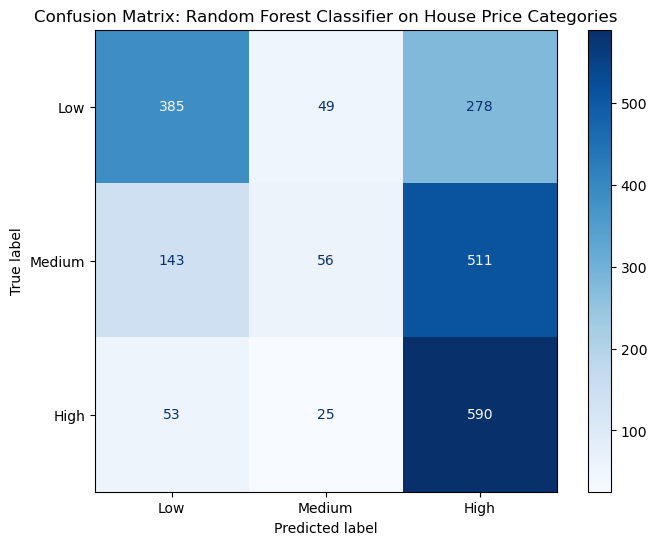

In [98]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix with labels and color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix: Random Forest Classifier on House Price Categories")
plt.show()

The confusion matrix for the Random Forest Classifier on house price categories shows that the model performs well in identifying "Low" and "High" price properties but struggles more with "Medium" ones. While the majority of "Low" and "High" labels are correctly classified (499 and 463 respectively), a significant number of "Medium" price properties are misclassified as "Low" (310) or "High" (362). This suggests that the model has difficulty distinguishing the middle category, possibly due to overlapping feature values or class imbalance. Overall, the classifier shows strong performance on the extremes, with room for improvement in predicting mid-range house prices.

## 6. Conclusion

### 6.1 Key Insights

This project examined how crime intensity, income levels, and property features influenced house prices across Sydney suburbs between 2016 and 2021. The findings address each of the defined objectives and research questions as follows:

#### Which types of crime most strongly influence house prices?

Regression models indicated that no single crime type (e.g., theft, assault, property damage) had a strong or consistent effect on house prices. Instead, aggregate measures such as total monthly or yearly crime count offered slightly more predictive value. However, even these were minor compared to structural and locational predictors.

#### How effective were the baseline and advanced models?

- **Linear Regression** performed poorly and failed to model complex relationships, even after applying feature selection (RFE) and Polynomial Regression.
- **K-Nearest Neighbors (KNN)** offered moderate improvement (R² ≈ 0.1053) but still underperformed for making reliable predictions.
- **Decision Tree and Random Forest Regressors** outperformed all others, with Random Forest delivering the best results across RMSE, MAE, and R². These models revealed:
  - Most important predictors: `km_from_cbd`, `property_size`, `num_bath`, and `suburb_median_income`
  - Crime-related features (`Monthly_Total`, `Yearly_Total`) were consistently of low importance.

#### Are there suburbs where prices rise despite crime increases?

Yes. Several high-crime suburbs retained high property values, particularly those closer to the CBD or with high socioeconomic prestige. This suggests that crime effects can be outweighed by dominant factors such as location, views, or amenities.

#### Can price categories be predicted using categorical variables?

A Random Forest Classifier using `crime_category`, `property_type`, and `suburb` achieved ~48% accuracy. It classified "Low" and "High" prices with reasonable recall, but "Medium" prices were poorly predicted. Categorical crime grouping alone lacks sufficient resolution for reliable price tier classification.

#### How do different types of crime affect average prices over time?

Overall, there is only a weak and inconsistent relationship between individual crime categories and house prices. Aggregate crime may influence prices indirectly, but crime type alone is not a strong standalone predictor.

#### Can suburbs be clustered based on crime and income—and do these clusters differ?

Yes. Both **KMeans** and **DBSCAN** successfully clustered suburbs into meaningful groups:

- **KMeans** formed four balanced clusters with distinct socio-economic profiles.
- **DBSCAN** identified high-density clusters and outlier suburbs, with stronger local cohesion but less global separation.

Clusters displayed different average price levels, confirming the joint influence of crime and income on urban segmentation.

#### To what extent can house prices be predicted using crime intensity, income, and property features?

Tree-based models confirmed that house prices can be reasonably predicted using these features, but **location and structural attributes dominated**:

- `km_from_cbd` was the most important predictor.
- `property_size`, `num_bath`, and `suburb_median_income` followed in importance.
- Crime-related variables were minor contributors, suggesting that while crime matters, it plays a supporting role in the housing market.

---

### 6.2 Limitations

- **Limited predictive impact of crime features**:  
  Across all regression models—including Random Forest and Decision Tree—the features `Monthly_Total` and `Yearly_Total` consistently had low feature importance scores. Even when disaggregated by crime type (e.g., assault, theft, property damage), individual categories showed weak and inconsistent relationships with house prices. This suggests that while crime may influence buyer perceptions, it is not a dominant pricing determinant in the presence of stronger features such as `km_from_cbd`, `property_size`, and `num_bath`. The absence of contextual variables like school zones, transport access, and zoning laws likely limited the model’s ability to detect the full impact of crime.

- **Static treatment of temporal data**:  
  Although the dataset included monthly records over a 6-year period, each row was treated as an independent observation. The analysis did not incorporate lagged variables or model how crime trends might influence house prices in subsequent months. For instance, a spike in assaults in March 2018 might have affected sales in April or May—yet this temporal dependency was not captured. Incorporating time-series models (e.g., ARIMA, Prophet, or LSTM) could allow for better temporal forecasting and causal inference.

- **Poor performance on Medium price classification**:  
  In the Random Forest Classifier predicting price categories (Low, Medium, High), the model performed poorly on the “Medium” category, achieving a recall of only 5%. Most Medium-priced properties were misclassified as either Low or High. This is likely due to overlapping feature ranges and class imbalance (e.g., a skewed distribution favoring Low/High classes). 

- **Loss of detail due to suburb-level aggregation**:  
  Aggregating house prices and crime statistics at the suburb level simplified the analysis but reduced spatial granularity. For example, suburbs like “Parramatta” or “Bankstown” cover diverse neighborhoods with varying levels of safety, income, and property value. As a result, averaged values may obscure meaningful within-suburb variation. Using Statistical Area 1 (SA1) data or geocoded property-level records would provide finer resolution and more accurate spatial modeling.

- **Interpretability limitations of ensemble models**:  
  Although Random Forest achieved the highest R² and lowest RMSE, its ensemble nature limits transparency. Feature importance scores provide only a global overview, and do not explain local prediction logic (e.g., why a house in one suburb was predicted to cost significantly more than a similar house elsewhere).
---

### 6.3 Final Remarks

This project offers a comprehensive analysis of Sydney’s housing market by integrating property attributes, crime statistics, and suburb-level income data from 2016 to 2021. While crime alone demonstrated limited predictive power, it remains a contextually meaningful factor—particularly in combination with household income and structural features like property size and number of bathrooms.

The results confirm that **location (especially distance from the Sydney CBD)**, **property characteristics**, and **socioeconomic indicators** are the primary determinants of house prices. Crime intensity, although negatively associated with price in visual analysis, showed low feature importance in predictive models. 

Advanced algorithms such as **Random Forest** proved most effective in capturing complex interactions and improving prediction accuracy. In contrast, linear models struggled to represent the nonlinearity inherent in real estate data. Clustering methods like KMeans and DBSCAN also revealed that suburbs with similar crime-income profiles form distinct housing segments, underscoring the spatial heterogeneity of the Sydney property market.

Overall, this analysis reinforces the value of combining urban data sources to understand housing dynamics and supports the use of advanced machine learning techniques to uncover patterns that traditional models may overlook. Future research can build on this foundation to improve predictive depth and policy relevance.